## 1. Import Libraries

In [544]:
import os

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [546]:
os.chdir('../')

In [547]:
%pwd

'c:\\Users'

## 2. Read Dataset

In [548]:
df = pd.read_excel('c:\\Users\\DELL\\OneDrive\\Desktop\\MachineLearning\\Machine Learning\\fuel-consumption-prediction\\dataset\\FuelConsumptionJoined.xlsx')

In [549]:
df.head()

Reg. No.             Vin. No. Odometer         Branch TCU Status  \
0  UK15 SMR  XYZ3458ABC909876878   109648  14 Tyre Fleet  Connected   
1  UK15 SMR  XYZ3458ABC909876879   144388  14 Tyre Fleet  Connected   
2  UK15 SMR  XYZ3458ABC909876880        -  12 Tyre Fleet  Connected   
3  UK15 SMR  XYZ3458ABC909876881    46898        Default  Connected   
4  UK15 SMR  XYZ3458ABC909876882    48984        Default  Connected   

        Total Travelled Fuel Efficiencyy Total Time  Harsh Acceleration  \
0                  0 Km         2.9 Km/L   498h 48m                 9.0   
1             5247.0 Km         2.8 Km/L   620h 17m                 7.0   
2              569.0 Km         2.5 Km/L   142h 12m                34.0   
3  4363.700000000004 Km         3.1 Km/L   406h 31m                24.0   
4  729.7000000000044 Km         2.4 Km/L   188h 41m                13.0   

   Harsh Braking  ... Model Fuel Type Fuel Consumption           VIN. NO.  \
0            0.0  ...   NaN    Diesel              NaN  MAT793002M1F12833   
1            0.0  ...   NaN    Diesel              NaN  MAT793002M1D10022   
2            0.0  ...   NaN    Diesel              NaN  MAT796001M1N25208   
3            0.0  ...   NaN    Diesel              NaN  MAT793008P1A02584   
4            0.0  ...   NaN    Diesel              NaN  MAT793008P5A00287   

  MODEL NAME FUEL CONSUMED ODOMETER START ODOMETER END DISTANCE (KMS)  \
0   LPT 4225      1144.3 L        98160.7     101206.9         3046.2   
1   LPT 4225      1433.1 L       135451.3     139378.9         3927.6   
2   LPT 3518         827 L        59165.5      61134.5         1969.0   
3     4225TC      1693.3 L        31796.4        37045         5248.6   
4     4225TC      1087.5 L        34963.6      37874.6         2911.0   

  FUEL EFFICIENCY  
0        2.7 Km/L  
1        2.7 Km/L  
2        2.3 Km/L  
3        3.1 Km/L  
4        2.7 Km/L  

[5 rows x 26 columns]

## 3. Exploratory Data Analysis

In [550]:
df.columns

Index(['Reg. No.', 'Vin. No.', 'Odometer', 'Branch', 'TCU Status',
       'Total Travelled', 'Fuel Efficiencyy', 'Total Time',
       'Harsh Acceleration', 'Harsh Braking', 'Stoppage Time', 'Idling Time',
       'Night Driving', 'Stopped', 'Idling', 'Moving', 'Model', 'Fuel Type',
       'Fuel Consumption', 'VIN. NO.', 'MODEL NAME', 'FUEL CONSUMED',
       'ODOMETER START', 'ODOMETER END', 'DISTANCE (KMS)', 'FUEL EFFICIENCY'],
      dtype='object')

In [551]:
df.shape

(164, 26)

In [552]:
(df.isnull().sum() / df.isnull().count() * 100)[df.isnull().sum() > 0]

Fuel Efficiencyy      24.390244
Harsh Acceleration    25.609756
Harsh Braking         25.609756
Stoppage Time         27.439024
Idling Time           27.439024
Night Driving         27.439024
Stopped               36.585366
Idling                36.585366
Moving                36.585366
Model                 96.951220
Fuel Consumption      96.951220
VIN. NO.              37.195122
MODEL NAME            37.195122
FUEL CONSUMED         37.195122
ODOMETER START        37.195122
ODOMETER END          37.195122
DISTANCE (KMS)        37.195122
FUEL EFFICIENCY       37.195122
dtype: float64

In [553]:
df.rename(columns={
    'ODOMETER START': 'Odometer Start', 'ODOMETER END': 'Odometer End', 'Idling': 'Idling Percentage', 'Moving': 'Moving Percentage', 'Stopped': 'Stopped Percentage'
    }, inplace=True)
df.columns

Index(['Reg. No.', 'Vin. No.', 'Odometer', 'Branch', 'TCU Status',
       'Total Travelled', 'Fuel Efficiencyy', 'Total Time',
       'Harsh Acceleration', 'Harsh Braking', 'Stoppage Time', 'Idling Time',
       'Night Driving', 'Stopped Percentage', 'Idling Percentage',
       'Moving Percentage', 'Model', 'Fuel Type', 'Fuel Consumption',
       'VIN. NO.', 'MODEL NAME', 'FUEL CONSUMED', 'Odometer Start',
       'Odometer End', 'DISTANCE (KMS)', 'FUEL EFFICIENCY'],
      dtype='object')

In [554]:
print(df.dtypes)

Reg. No.               object
Vin. No.               object
Odometer               object
Branch                 object
TCU Status             object
Total Travelled        object
Fuel Efficiencyy       object
Total Time             object
Harsh Acceleration    float64
Harsh Braking         float64
Stoppage Time          object
Idling Time            object
Night Driving          object
Stopped Percentage     object
Idling Percentage      object
Moving Percentage      object
Model                  object
Fuel Type              object
Fuel Consumption       object
VIN. NO.               object
MODEL NAME             object
FUEL CONSUMED          object
Odometer Start         object
Odometer End           object
DISTANCE (KMS)        float64
FUEL EFFICIENCY        object
dtype: object


In [555]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reg. No.            164 non-null    object 
 1   Vin. No.            164 non-null    object 
 2   Odometer            164 non-null    object 
 3   Branch              164 non-null    object 
 4   TCU Status          164 non-null    object 
 5   Total Travelled     164 non-null    object 
 6   Fuel Efficiencyy    124 non-null    object 
 7   Total Time          164 non-null    object 
 8   Harsh Acceleration  122 non-null    float64
 9   Harsh Braking       122 non-null    float64
 10  Stoppage Time       119 non-null    object 
 11  Idling Time         119 non-null    object 
 12  Night Driving       119 non-null    object 
 13  Stopped Percentage  104 non-null    object 
 14  Idling Percentage   104 non-null    object 
 15  Moving Percentage   104 non-null    object 
 16  Model   

In [556]:
df.describe()

Harsh Acceleration  Harsh Braking  DISTANCE (KMS)
count          122.000000     122.000000      103.000000
mean            38.877049       0.032787     4178.074757
std             85.182214       0.178813    12541.282857
min              0.000000       0.000000        0.000000
25%              1.000000       0.000000     1721.900000
50%              7.500000       0.000000     2443.600000
75%             33.000000       0.000000     2891.500000
max            513.000000       1.000000    92566.400000

### 3.1 Univariate Analysis

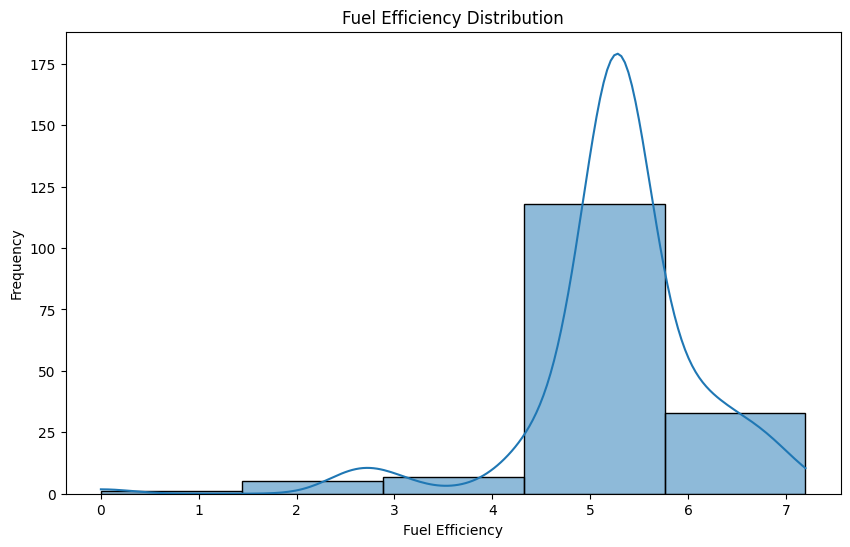

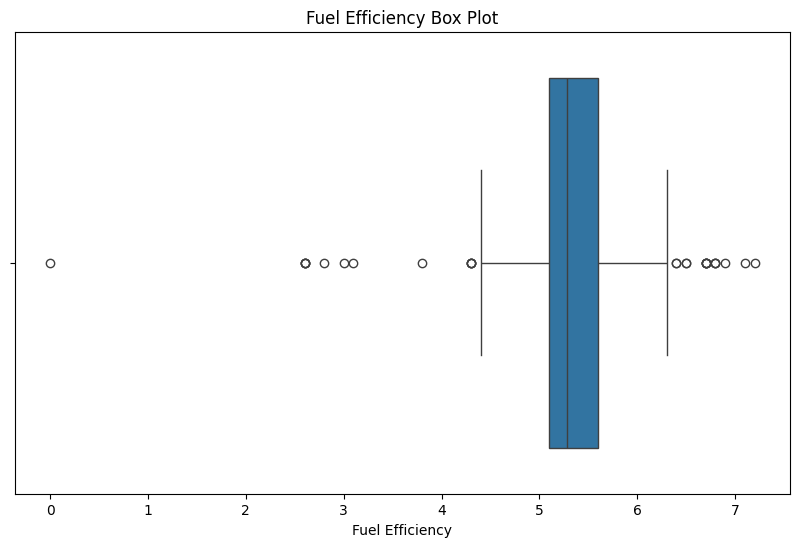

In [729]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Fuel Efficiency'], bins=5, kde=True)
plt.title('Fuel Efficiency Distribution')
plt.xlabel('Fuel Efficiency')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fuel Efficiency'])
plt.title('Fuel Efficiency Box Plot')
plt.xlabel('Fuel Efficiency')
plt.show()

### 3.2 Bivariate Analysis

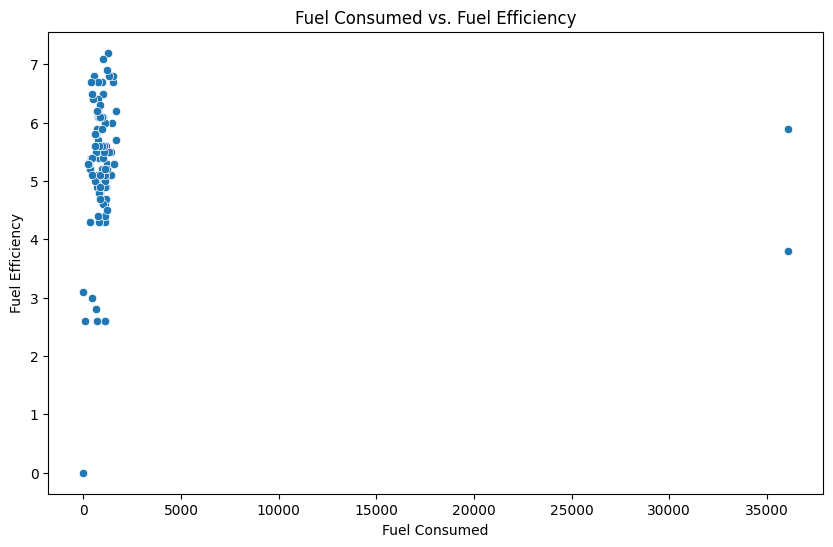

In [730]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel Consumed', y='Fuel Efficiency', data=df)
plt.title('Fuel Consumed vs. Fuel Efficiency')
plt.xlabel('Fuel Consumed')
plt.ylabel('Fuel Efficiency')
plt.show()

### 3.3 Multivariate Analysis

<Figure size 1200x800 with 0 Axes>

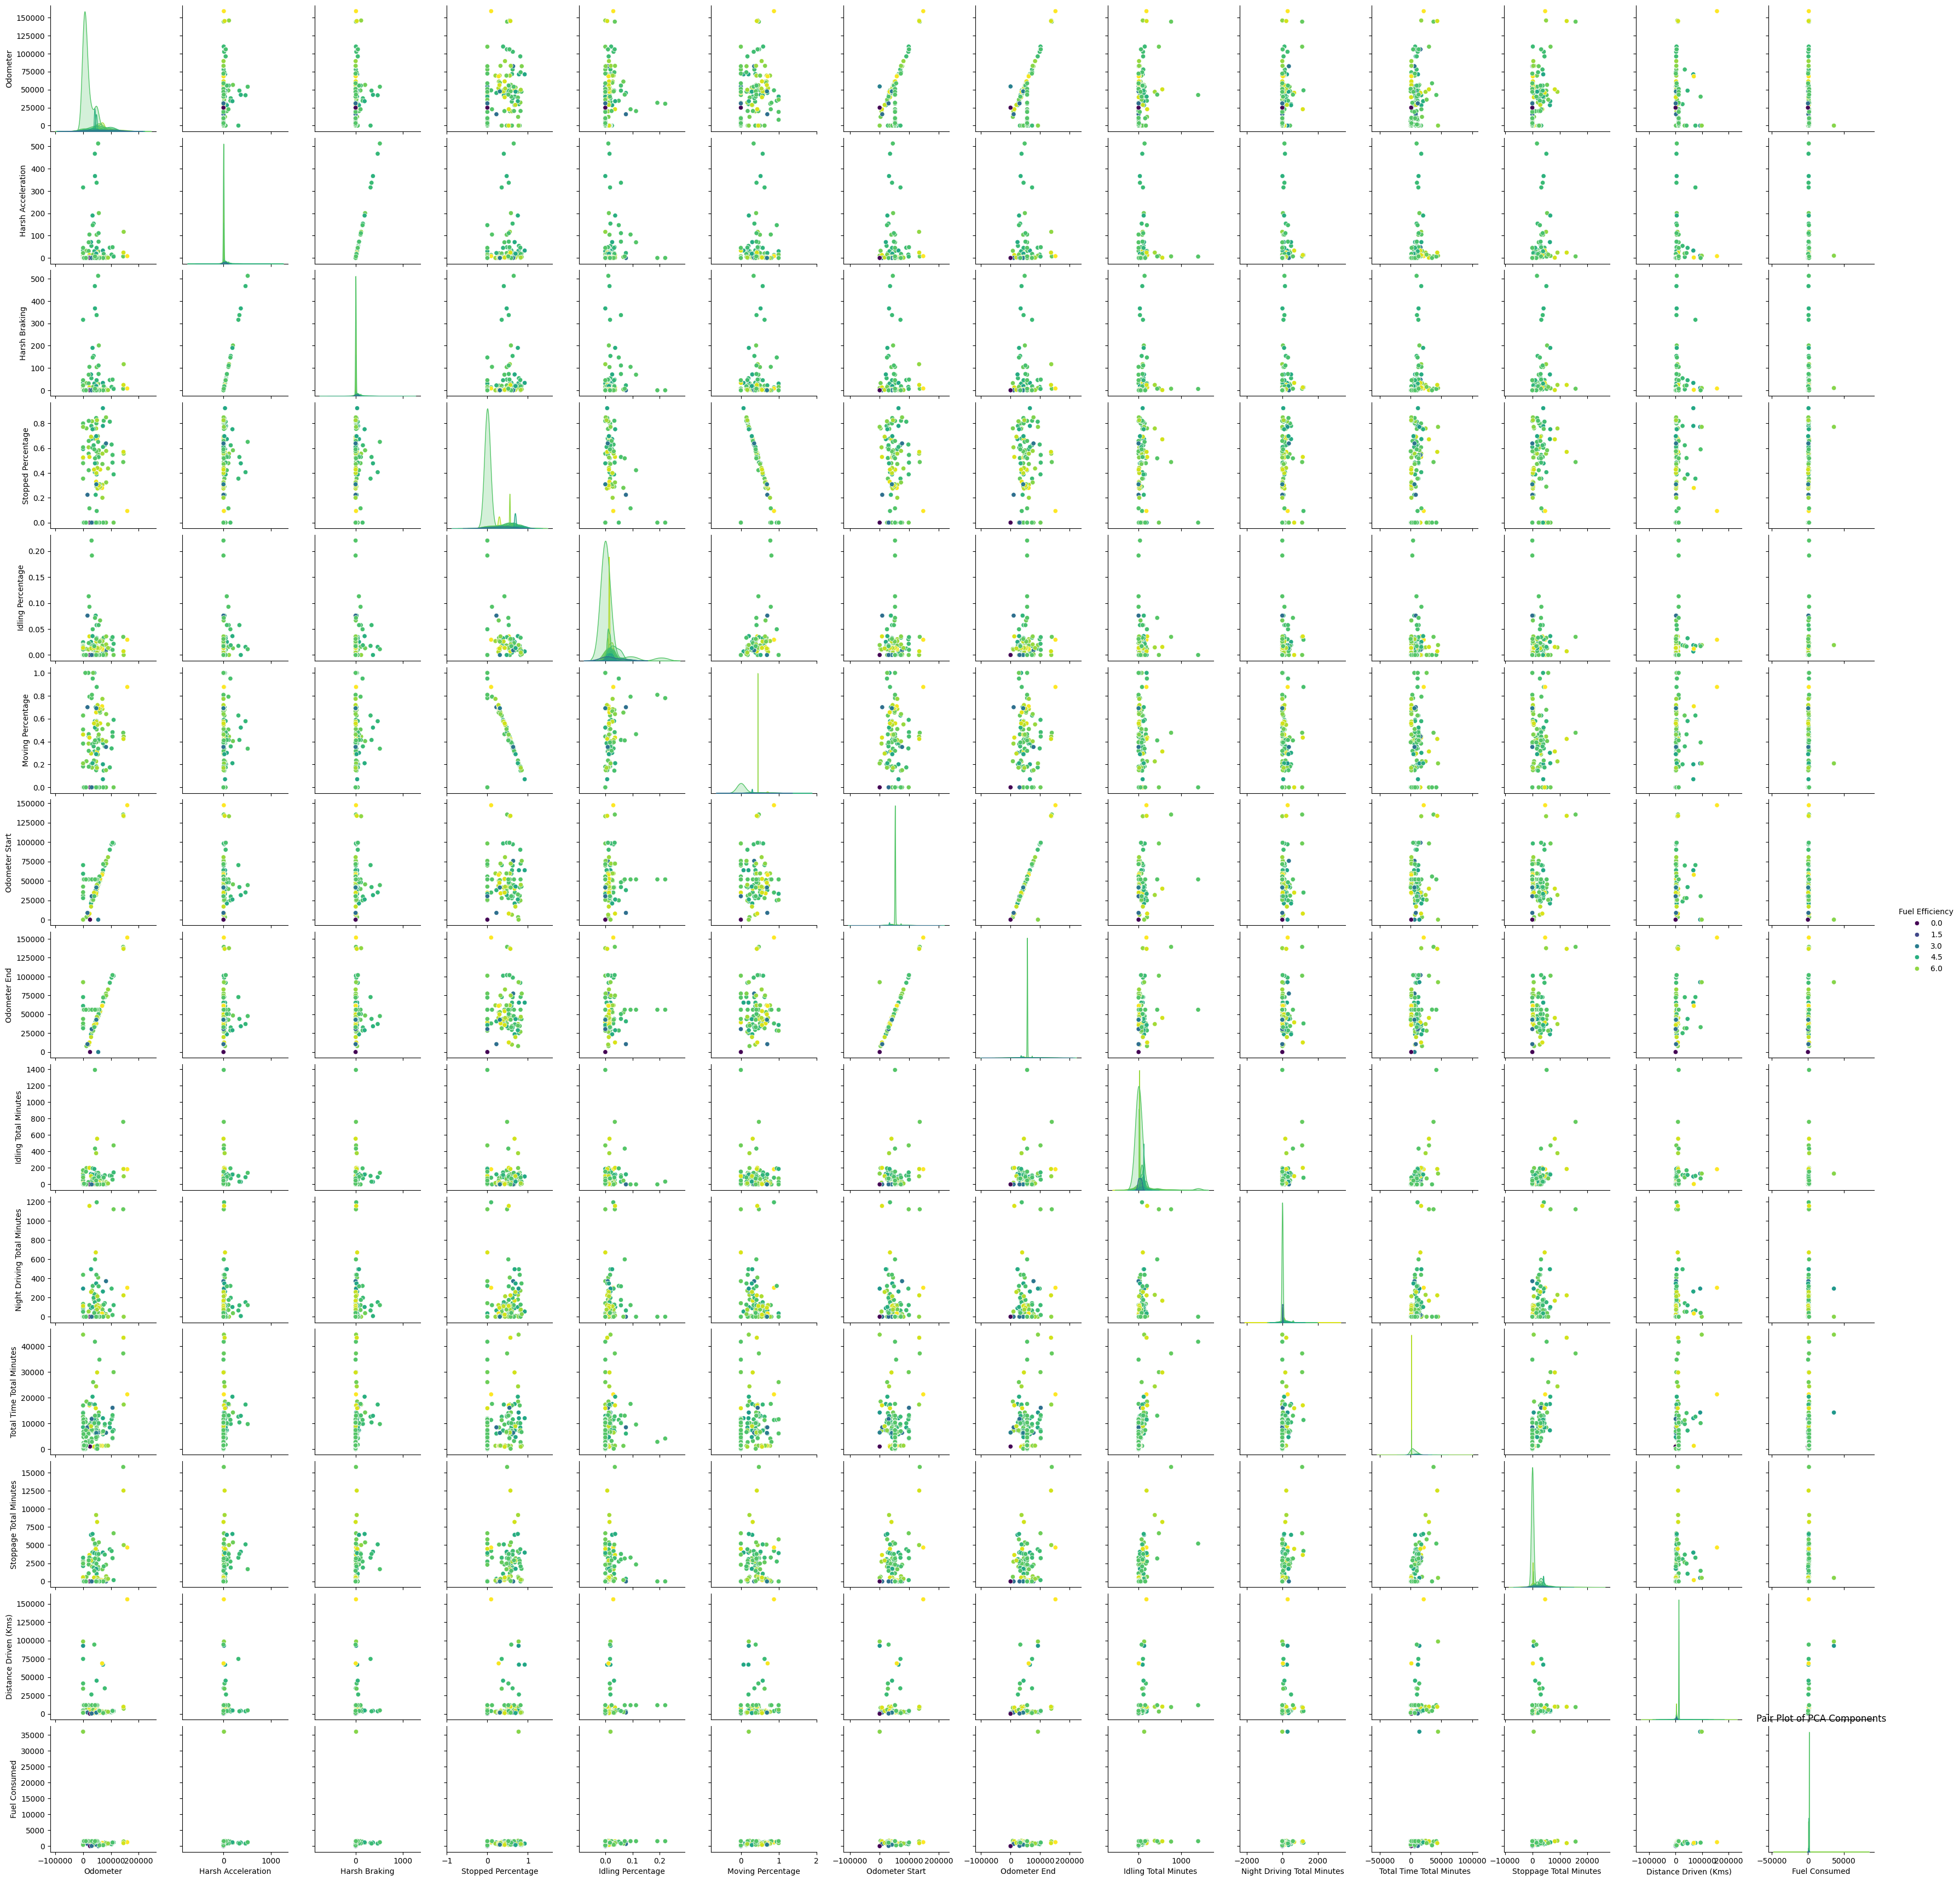

In [732]:
# Pair Plot
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Fuel Efficiency', palette='viridis')
plt.title('Pair Plot of PCA Components')
plt.show()

## 4. Feature Engineering

### 4.1 Data Imputation and Cleaning

In [557]:
df['Distance Driven (KMS)'] = df['Total Travelled'].apply(lambda x: round(float(x.split()[0]), 2))

In [558]:
df['Fuel Efficiency A'] = [str(val).replace(' Km/L', '').replace(' Km/Kg', '') for val in df['Fuel Efficiencyy']]
df['Fuel Efficiency B'] = [str(val).replace(' Km/L', '').replace(' Km/Kg', '') for val in df['FUEL EFFICIENCY']]

In [559]:
df['Fuel Efficiency A'] = df['Fuel Efficiency A'].replace('-', np.nan)
df['Fuel Efficiency A'] = pd.to_numeric(df['Fuel Efficiency A'], errors='coerce')

df['Fuel Efficiency B'] = df['Fuel Efficiency B'].replace('-', np.nan)
df['Fuel Efficiency B'] = pd.to_numeric(df['Fuel Efficiency B'], errors='coerce')

In [560]:
# Print unique values for Odometer column
unique_values = df['Odometer'].unique()
df['Odometer'] = df['Odometer'].replace('-', '0')
df['Odometer'] = df['Odometer'].astype(float)

In [561]:
# Print unique values for Harsh Acceleration column
unique_values = df['Harsh Acceleration'].unique()
df['Harsh Acceleration'] = df['Harsh Acceleration'].fillna(0)
df['Harsh Acceleration'] = df['Harsh Acceleration'].astype(float)

In [562]:
# Print unique values for Harsh Braking column
unique_values = df['Harsh Braking'].unique()
df['Harsh Braking'] = df['Harsh Acceleration'].fillna(0)
df['Harsh Braking'] = df['Harsh Braking'].astype(float)

In [563]:
df['Fuel Consumed A'] = [str(val).replace(' L', '').replace(' Kg', '') for val in df['Fuel Consumption']]
# Print unique values for Harsh Braking column
unique_values = df['Fuel Consumed A'].unique()
df['Fuel Consumed A'] = df['Fuel Consumed A'].fillna(0)
df['Fuel Consumed A'] = df['Fuel Consumed A'].astype(float)

In [564]:
df['Fuel Consumed B'] = [str(val).replace(' L', '').replace(' Kg', '') for val in df['FUEL CONSUMED']]
# Print unique values for Harsh Braking column
unique_values = df['Fuel Consumed B'].unique()
df['Fuel Consumed B'] = df['Fuel Consumed B'].fillna(0)
df['Fuel Consumed B'] = df['Fuel Consumed B'].astype(float)

In [565]:
# Print unique values for Odometer column
unique_values = df['Odometer Start'].unique()
df['Odometer Start'] = df['Odometer Start'].replace('-', '0')
df['Odometer Start'] = df['Odometer Start'].astype(float)

In [566]:
# Print unique values for Odometer column
unique_values = df['Odometer End'].unique()
df['Odometer End'] = df['Odometer End'].replace('-', '0')
df['Odometer End'] = df['Odometer End'].astype(float)

In [567]:
# Custom function to convert values to '0h Xm' format
def convert_to_hours_minutes(value):
    if 'h' not in value:
        return f'0h {value}'
    return value

# Custom function to convert values to '0h Xm' format
def convert_to_minutes_hours(value):
    if 'm' not in value:
        return f'{value} 0m'
    return value

In [568]:
df['Idling Time'] = df['Idling Time'].fillna('0h 0m')
df['Night Driving'] = df['Night Driving'].fillna('0h 0m')
df['Total Time'] = df['Total Time'].fillna('0h 0m')
df['Stoppage Time'] = df['Stoppage Time'].fillna('0h 0m')

df['Idling Time'] = df['Idling Time'].apply(convert_to_hours_minutes)
df['Idling Time'] = df['Idling Time'].apply(convert_to_minutes_hours)

df['Night Driving'] = df['Night Driving'].apply(convert_to_hours_minutes)
df['Night Driving'] = df['Night Driving'].apply(convert_to_minutes_hours)

df['Total Time'] = df['Total Time'].apply(convert_to_hours_minutes)
df['Total Time'] = df['Total Time'].apply(convert_to_minutes_hours)

df['Stoppage Time'] = df['Stoppage Time'].apply(convert_to_hours_minutes)
df['Stoppage Time'] = df['Stoppage Time'].apply(convert_to_minutes_hours)

In [569]:

df['Idling Time Hours'] = df['Idling Time'].apply(lambda x: int(x.split('h')[0]))
df['Idling Time Minutes'] = df['Idling Time'].apply(lambda x: int(x.split('h')[1].split('m')[0] if '-' not in x else x.split('h')[1].split('-')[1].split('m')[0]))


df['Night Driving Hours'] = df['Night Driving'].apply(lambda x: int(x.split('h')[0]))
df['Night Driving Minutes'] = df['Night Driving'].apply(lambda x: int(x.split('h')[1].split('m')[0]))

df['Total Time Hours'] = df['Total Time'].apply(lambda x: int(x.split('h')[0]))
df['Total Time Minutes'] = df['Total Time'].apply(lambda x: int(x.split('h')[1].split('m')[0]))

df['Stoppage Time Hours'] = df['Stoppage Time'].apply(lambda x: int(x.split('h')[0]))
df['Stoppage Time Minutes'] = df['Stoppage Time'].apply(lambda x: int(x.split('h')[1].split('m')[0] if '-' not in x else x.split('h')[1].split('-')[1].split('m')[0]))


df['Idling Total Minutes'] = df['Idling Time Hours'] * 60 + df['Idling Time Minutes']
df['Night Driving Total Minutes'] = df['Night Driving Hours'] * 60 + df['Night Driving Minutes']
df['Total Time Total Minutes'] = df['Total Time Hours'] * 60 + df['Total Time Minutes']
df['Stoppage Total Minutes'] = df['Stoppage Time Hours'] * 60 + df['Stoppage Time Minutes']

In [570]:
df.drop(columns=['Reg. No.', 'Vin. No.', 'Branch', 'TCU Status', 'Total Travelled', 'Fuel Efficiencyy',
                 'Total Time', 'Stoppage Time', 'Idling Time',
       'Night Driving', 'Fuel Consumption', 'VIN. NO.', 'FUEL CONSUMED', 'FUEL EFFICIENCY'], axis=1, inplace=True)

In [571]:
df['Stopped Percentage'] = df['Stopped Percentage'].fillna('0%')
df['Moving Percentage'] = df['Moving Percentage'].fillna('0%')
df['Idling Percentage'] = df['Idling Percentage'].fillna('0%')

df['Stopped Percentage'] = df['Stopped Percentage'].str.rstrip('%').astype('float') / 100.0
df['Moving Percentage'] = df['Moving Percentage'].str.rstrip('%').astype('float') / 100.0
df['Idling Percentage'] = df['Idling Percentage'].str.rstrip('%').astype('float') / 100.0

df['Stopped Percentage'] = df['Stopped Percentage'].fillna(0.000)
df['Moving Percentage'] = df['Moving Percentage'].fillna(0.000)
df['Idling Percentage'] = df['Idling Percentage'].fillna(0.000)

In [572]:
df.drop(columns=['Idling Time Hours',
       'Idling Time Minutes', 'Night Driving Hours', 'Night Driving Minutes',
       'Total Time Hours', 'Total Time Minutes', 'Stoppage Time Hours',
       'Stoppage Time Minutes'], axis=1, inplace=True)

In [573]:
df['Fuel Efficiency'] = df['Fuel Efficiency A'] + df['Fuel Efficiency B']
df['Fuel Efficiency'] = df['Fuel Efficiency'].replace('', np.nan)

In [574]:
df['Distance Driven (Kms)'] = df['Distance Driven (KMS)'] + df['DISTANCE (KMS)']
df['Distance Driven (Kms)'] = df['Distance Driven (Kms)'].replace('', np.nan)

In [575]:
df['Fuel Consumed'] = df['Fuel Consumed B']
df['Model Type'] = df['MODEL NAME']

In [576]:
df.drop(columns=['Fuel Efficiency A', 'Fuel Efficiency B', 'Distance Driven (KMS)',
       'DISTANCE (KMS)', 'Model', 'Fuel Consumed A', 'Fuel Consumed B', 'MODEL NAME'], axis=1, inplace=True)

In [577]:
df['Odometer Start'] = df['Odometer Start'].fillna(df['Odometer Start'].mean())
df['Odometer End'] = df['Odometer End'].fillna(df['Odometer End'].mean())
df['Fuel Efficiency'] = df['Fuel Efficiency'].fillna(df['Fuel Efficiency'].mean())
df['Distance Driven (Kms)'] = df['Distance Driven (Kms)'].fillna(df['Distance Driven (Kms)'].mean())
df['Fuel Consumed'] = df['Fuel Consumed'].fillna(df['Fuel Consumed'].mean())
df['Model Type'] = df['Model Type'].fillna(df['Model Type'].mode()[0])

In [578]:
df.shape

(164, 17)

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Odometer                     164 non-null    float64
 1   Harsh Acceleration           164 non-null    float64
 2   Harsh Braking                164 non-null    float64
 3   Stopped Percentage           164 non-null    float64
 4   Idling Percentage            164 non-null    float64
 5   Moving Percentage            164 non-null    float64
 6   Fuel Type                    164 non-null    object 
 7   Odometer Start               164 non-null    float64
 8   Odometer End                 164 non-null    float64
 9   Idling Total Minutes         164 non-null    int64  
 10  Night Driving Total Minutes  164 non-null    int64  
 11  Total Time Total Minutes     164 non-null    int64  
 12  Stoppage Total Minutes       164 non-null    int64  
 13  Fuel Efficiency     

In [580]:
df.columns

Index(['Odometer', 'Harsh Acceleration', 'Harsh Braking', 'Stopped Percentage',
       'Idling Percentage', 'Moving Percentage', 'Fuel Type', 'Odometer Start',
       'Odometer End', 'Idling Total Minutes', 'Night Driving Total Minutes',
       'Total Time Total Minutes', 'Stoppage Total Minutes', 'Fuel Efficiency',
       'Distance Driven (Kms)', 'Fuel Consumed', 'Model Type'],
      dtype='object')

In [581]:
df.describe()

Odometer  Harsh Acceleration  Harsh Braking  Stopped Percentage  \
count     164.000000          164.000000     164.000000          164.000000   
mean    40599.213415           28.920732      28.920732            0.317192   
std     35462.319924           75.339720      75.339720            0.303768   
min         0.000000            0.000000       0.000000            0.000000   
25%      9011.000000            0.000000       0.000000            0.000000   
50%     39783.500000            2.000000       2.000000            0.309050   
75%     57079.000000           22.000000      22.000000            0.571450   
max    158998.000000          513.000000     513.000000            0.922500   

       Idling Percentage  Moving Percentage  Odometer Start   Odometer End  \
count         164.000000         164.000000      164.000000     164.000000   
mean            0.015879           0.294976    51898.863107   56076.937864   
std             0.028388           0.285101    24243.973511   23997.921739   
min             0.000000           0.000000        0.000000       0.000000   
25%             0.000000           0.000000    41442.900000   43789.800000   
50%             0.009900           0.292450    51898.863107   56076.937864   
75%             0.018725           0.478075    51898.863107   56112.028398   
max             0.220300           1.000000   147439.300000  151698.300000   

       Idling Total Minutes  Night Driving Total Minutes  \
count            164.000000                   164.000000   
mean              67.426829                   103.152439   
std              144.825898                   210.387565   
min                0.000000                     0.000000   
25%                0.000000                     0.000000   
50%               20.000000                     7.500000   
75%               88.250000                   119.000000   
max             1391.000000                  1193.000000   

       Total Time Total Minutes  Stoppage Total Minutes  Fuel Efficiency  \
count                164.000000              164.000000       164.000000   
mean                8308.146341             1743.115854         5.285149   
std                 8288.329237             2431.117924         0.891431   
min                   23.000000                0.000000         0.000000   
25%                 1496.250000                0.000000         5.100000   
50%                 6723.500000              359.000000         5.285149   
75%                11405.500000             3196.250000         5.600000   
max                44520.000000            15773.000000         7.200000   

       Distance Driven (Kms)  Fuel Consumed  
count             164.000000     164.000000  
mean            11680.705825    1563.286408  
std             19988.324039    3870.060853  
min                 0.000000       0.000000  
25%              2910.250000     788.000000  
50%              6172.500000    1131.900000  
75%             11680.705825    1563.286408  
max            156202.000000   36077.500000

### 4.2 Outliers Treatment

In [582]:
numerical_features = ['Odometer', 'Harsh Acceleration', 'Harsh Braking', 'Stopped Percentage',
       'Idling Percentage', 'Moving Percentage', 'Odometer Start',
       'Odometer End', 'Idling Total Minutes', 'Night Driving Total Minutes',
       'Total Time Total Minutes', 'Stoppage Total Minutes', 'Fuel Efficiency',
       'Distance Driven (Kms)', 'Fuel Consumed']

categorical_features = ['Model Type', 'Fuel Type']

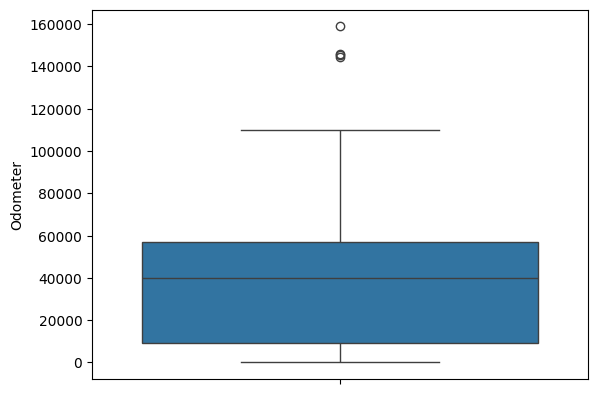

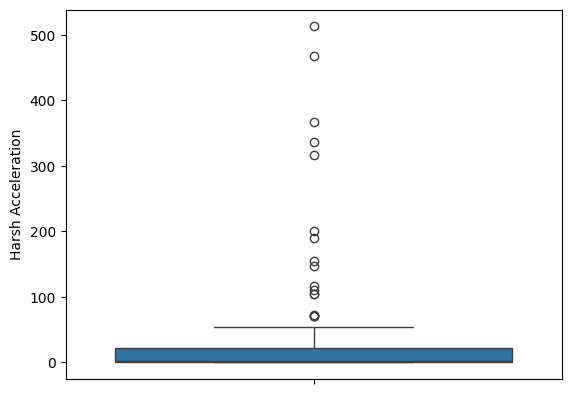

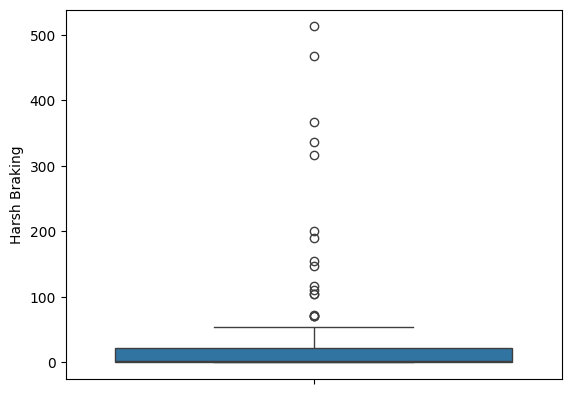

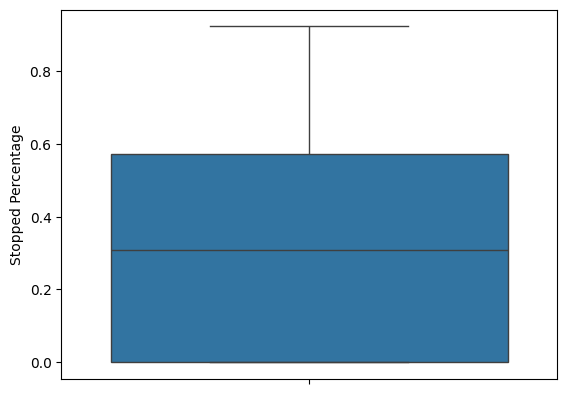

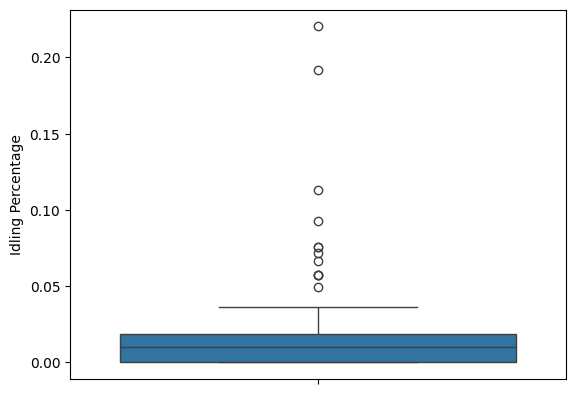

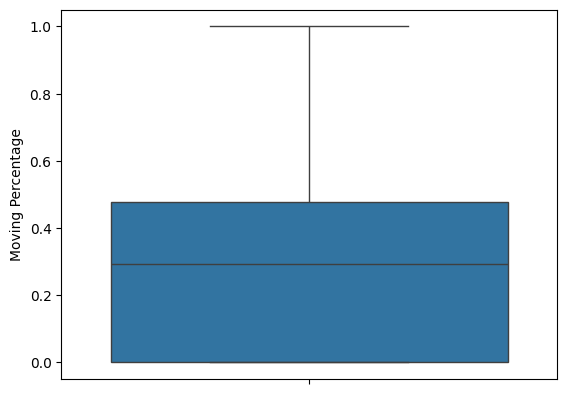

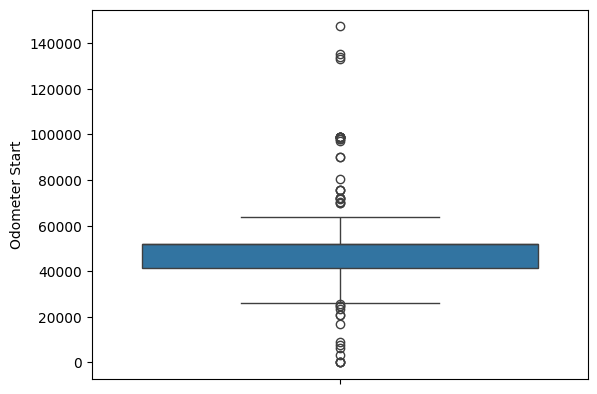

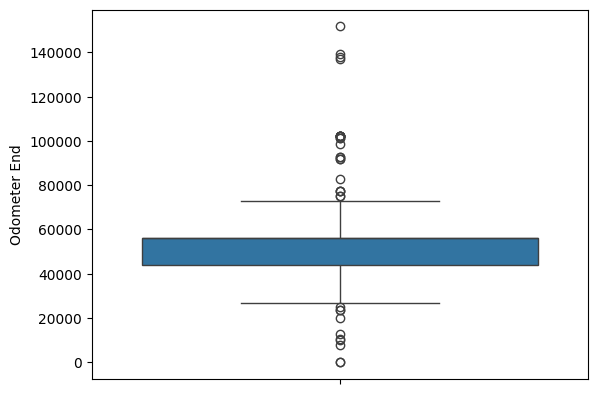

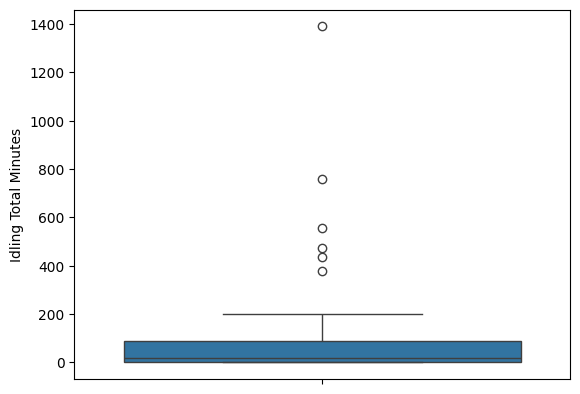

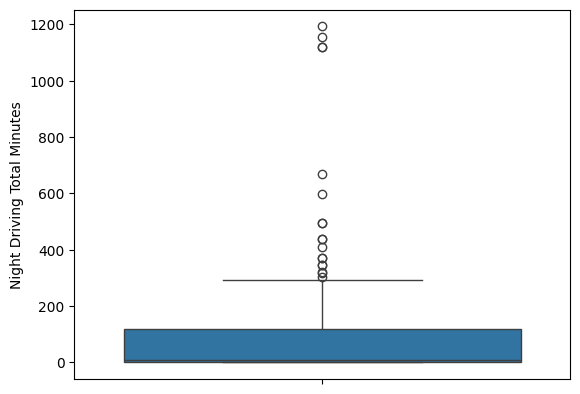

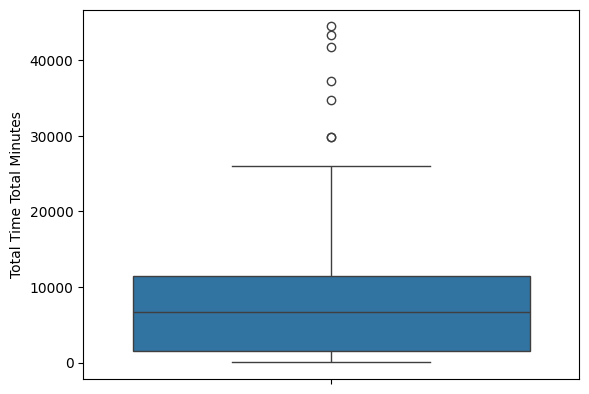

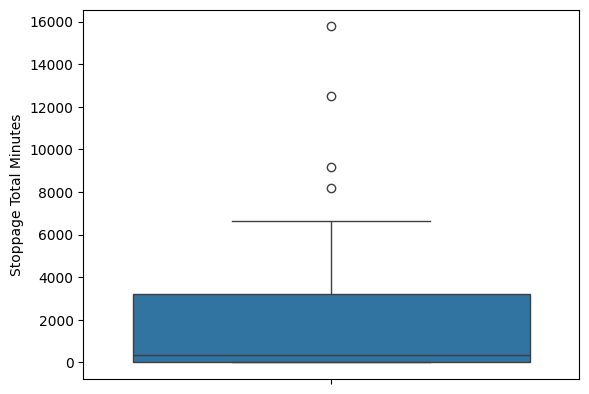

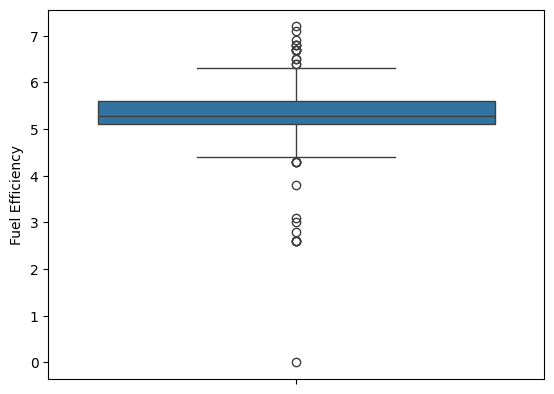

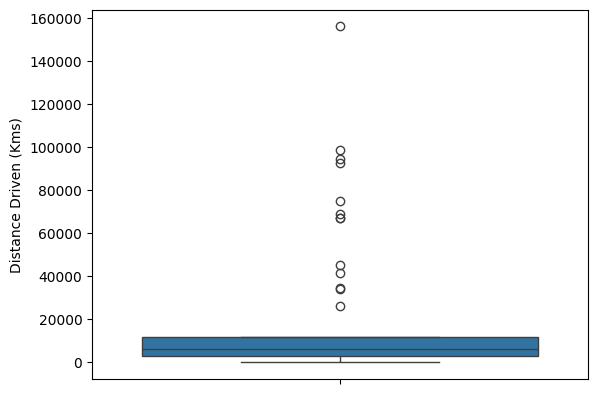

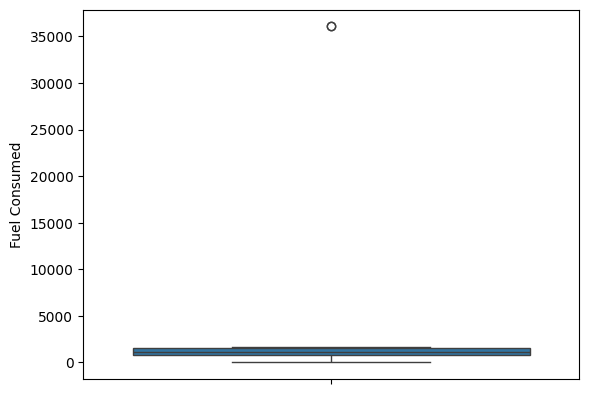

In [583]:
for col in df.columns:
    if df[col].dtypes!= object:
        sns.boxplot(y=col,data=df)
        plt.show()

In [584]:
# Function to remove outliers using IQR
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [585]:
# Removing outliers from numerical features
df_copy = remove_outliers(df, numerical_features)
df_copy.head(1)

Odometer  Harsh Acceleration  Harsh Braking  Stopped Percentage  \
34    9011.0                 0.0            0.0                 0.0   

    Idling Percentage  Moving Percentage Fuel Type  Odometer Start  \
34                0.0                0.0    Diesel    51898.863107   

    Odometer End  Idling Total Minutes  Night Driving Total Minutes  \
34  56076.937864                     0                            0   

    Total Time Total Minutes  Stoppage Total Minutes  Fuel Efficiency  \
34                      4729                       0         5.285149   

    Distance Driven (Kms)  Fuel Consumed Model Type  
34           11680.705825    1563.286408     3518TC

In [586]:
# Function to remove outliers using Z-Score
def remove_outliers_zscore(df, features, threshold=3):
    for feature in features:
        mean = df[feature].mean()
        std = df[feature].std()
        z_scores = (df[feature] - mean) / std
        df = df[np.abs(z_scores) <= threshold]
    return df

In [587]:
# Removing outliers from numerical features using Z-score method
df_copy_z = remove_outliers_zscore(df, numerical_features)

In [588]:
# for col in df_copy_z.columns:
#     if df_copy_z[col].dtypes!= object:
#         sns.boxplot(y=col,data=df_copy_z)
#         plt.show()

In [589]:
# for col in df_copy.columns:
#     if df_copy[col].dtypes!= object:
#         sns.boxplot(y=col,data=df_copy)
#         plt.show()

### 4.3 Distribution Analysis for Categorical and Numerical features

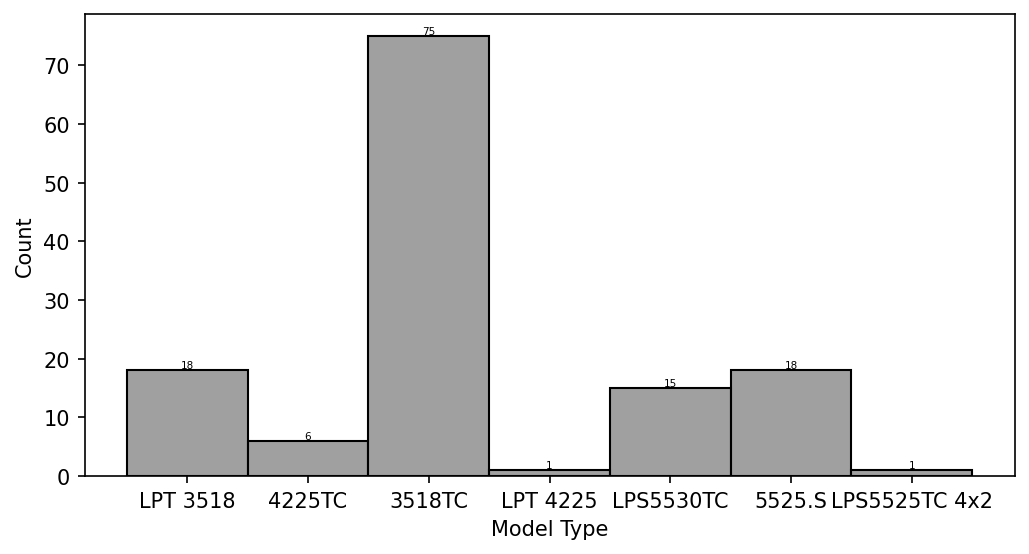

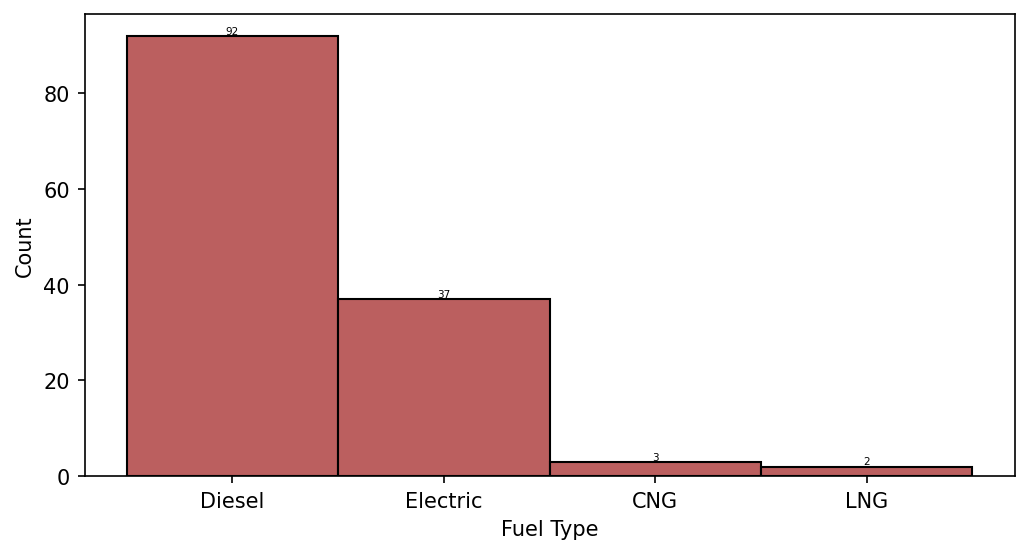

In [590]:
color_set = ['grey','brown','Thistle', 'SaddleBrown']
for cat_feature, color in zip(categorical_features, color_set):
    plt.figure(figsize=(8,4), dpi=150)
    chart1=sns.histplot(data=df_copy_z, x=cat_feature, color=color)
    chart1.bar_label(chart1.containers[0],size=5)
    plt.show()

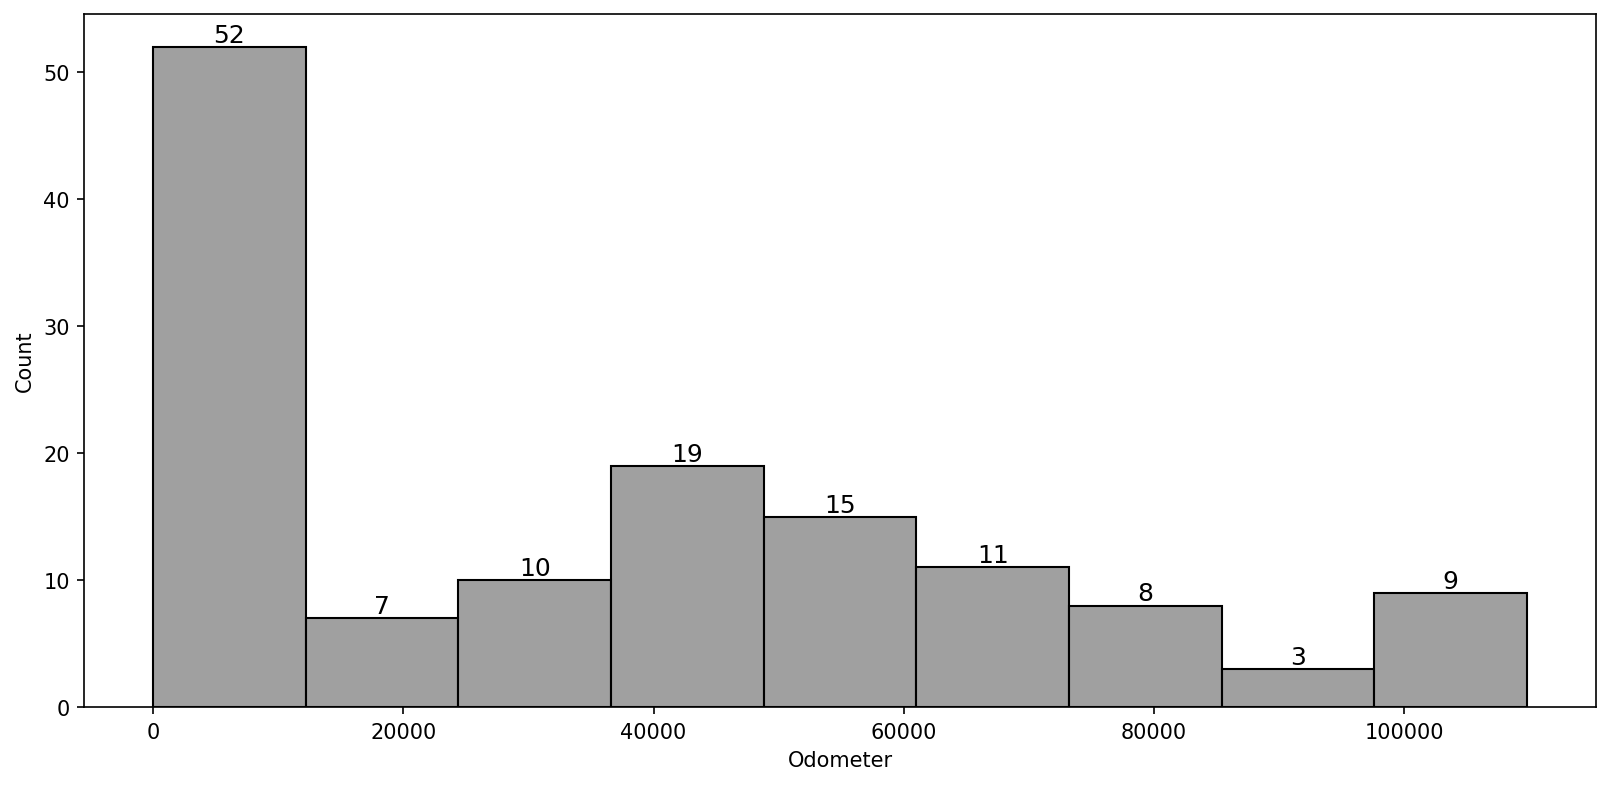

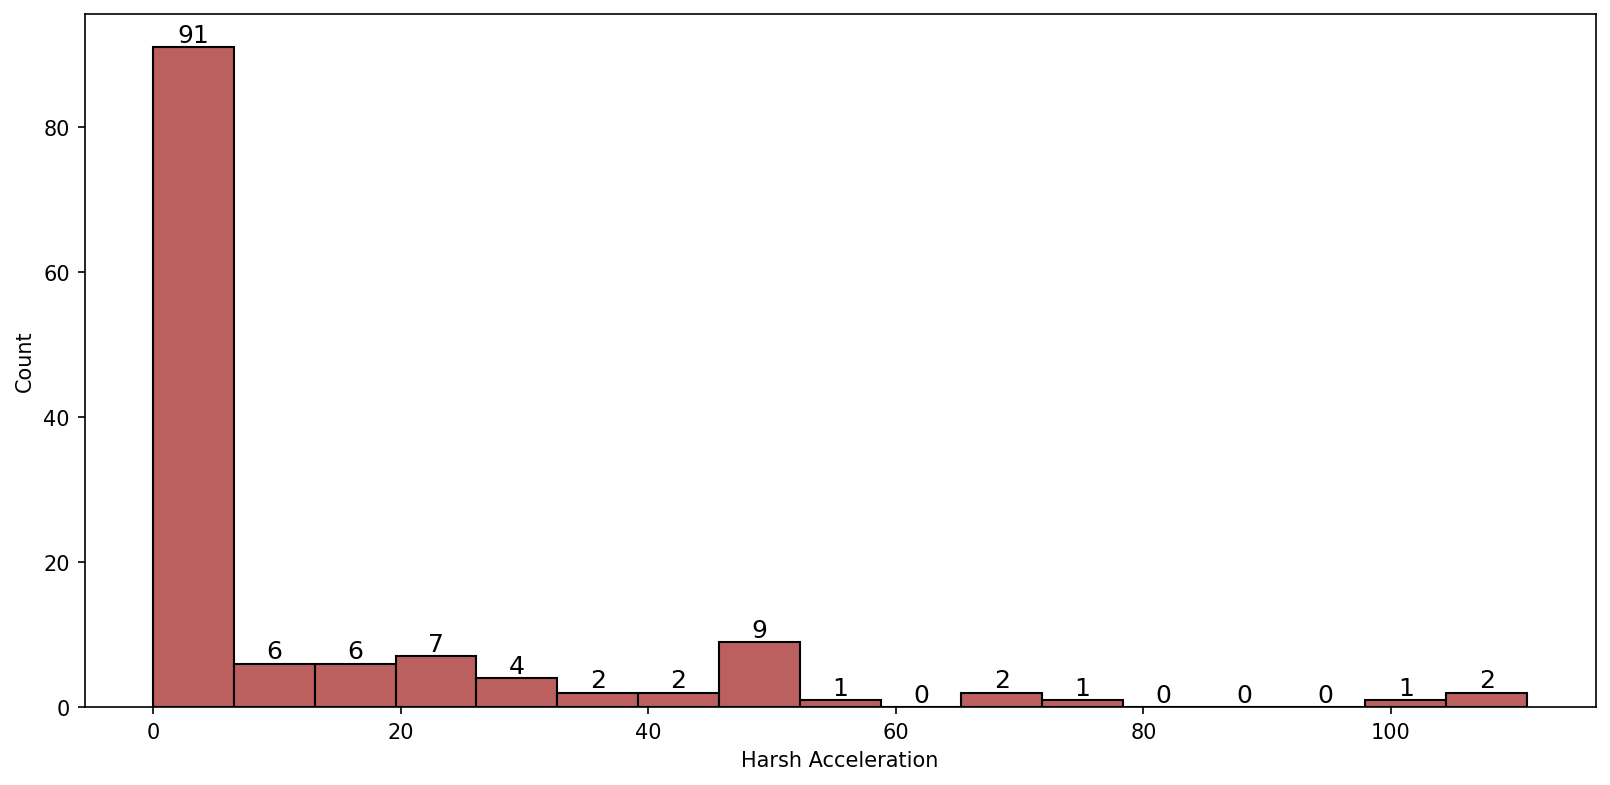

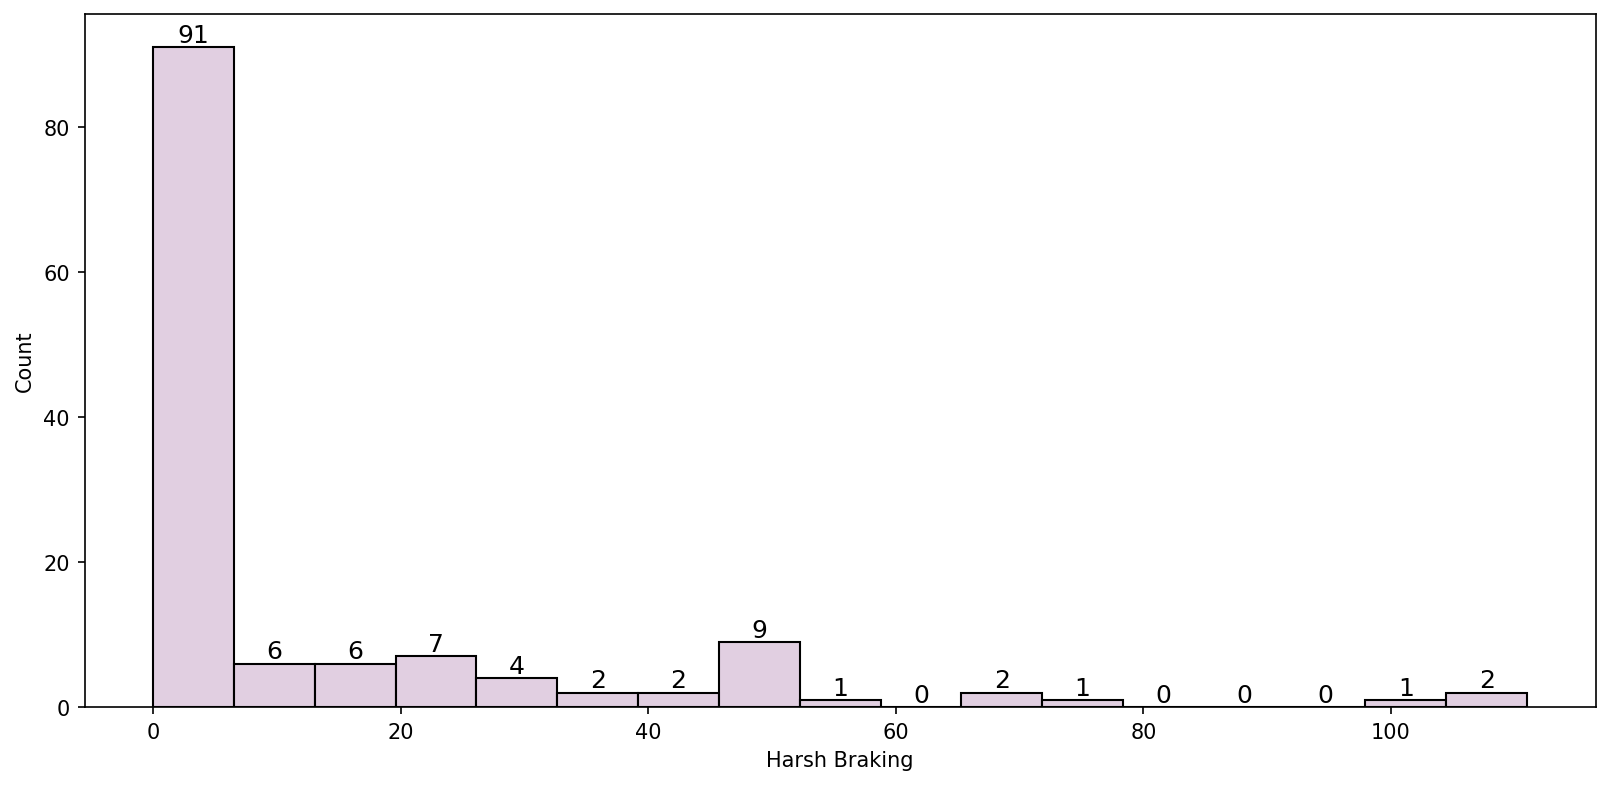

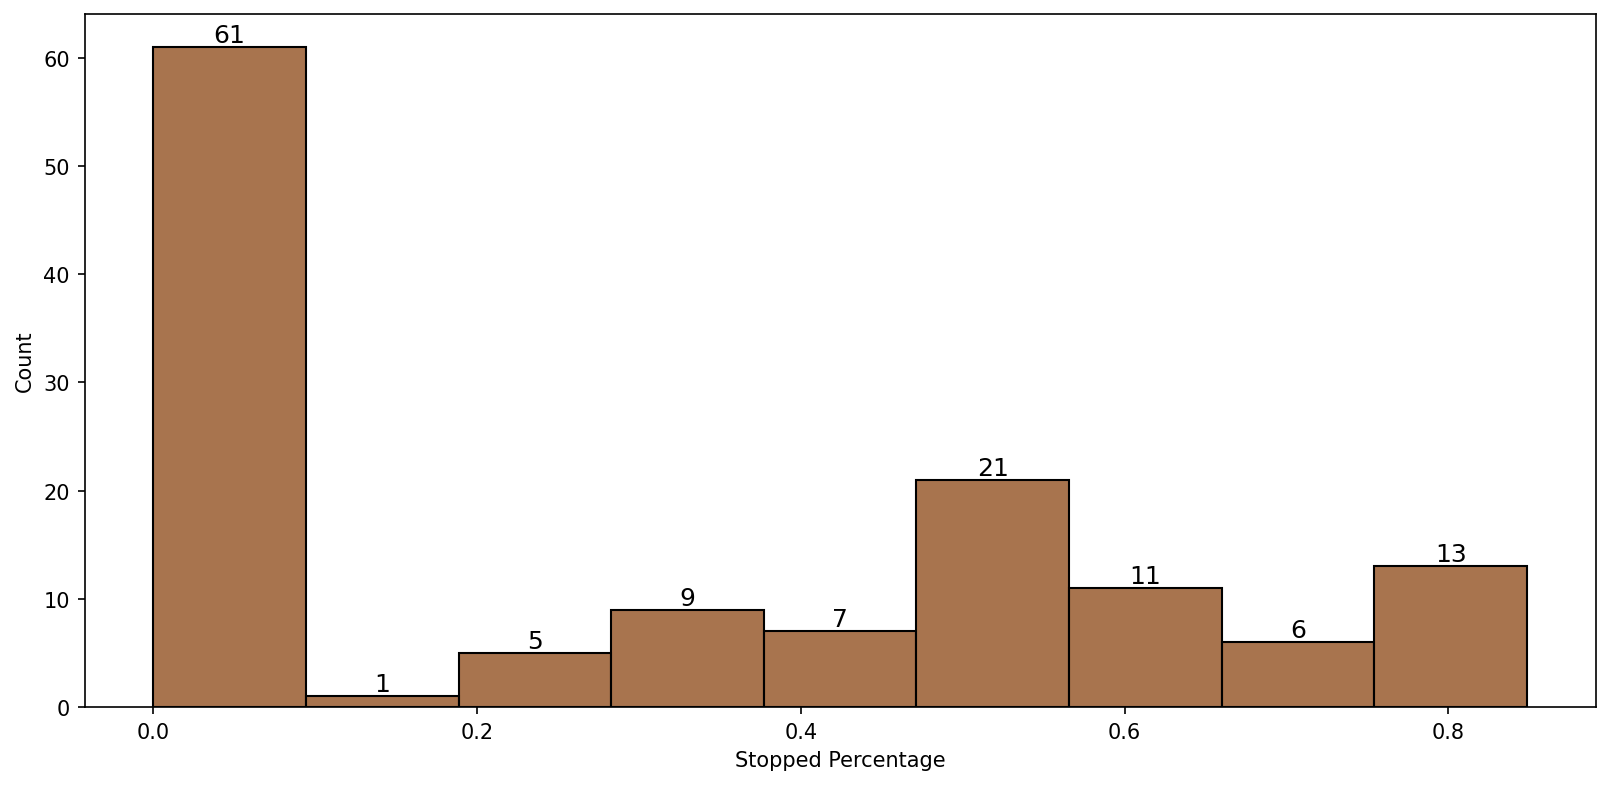

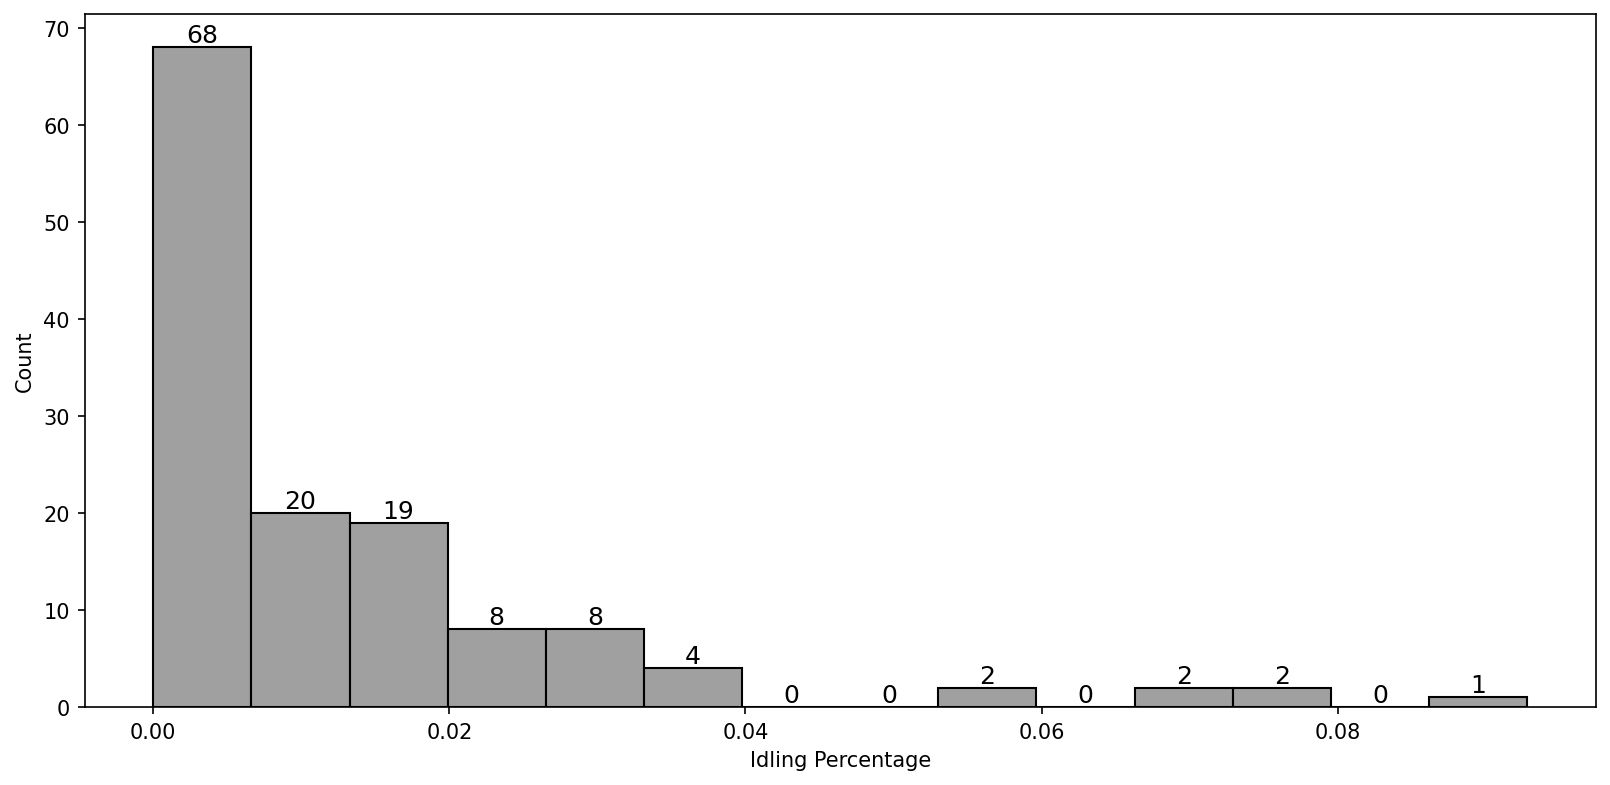

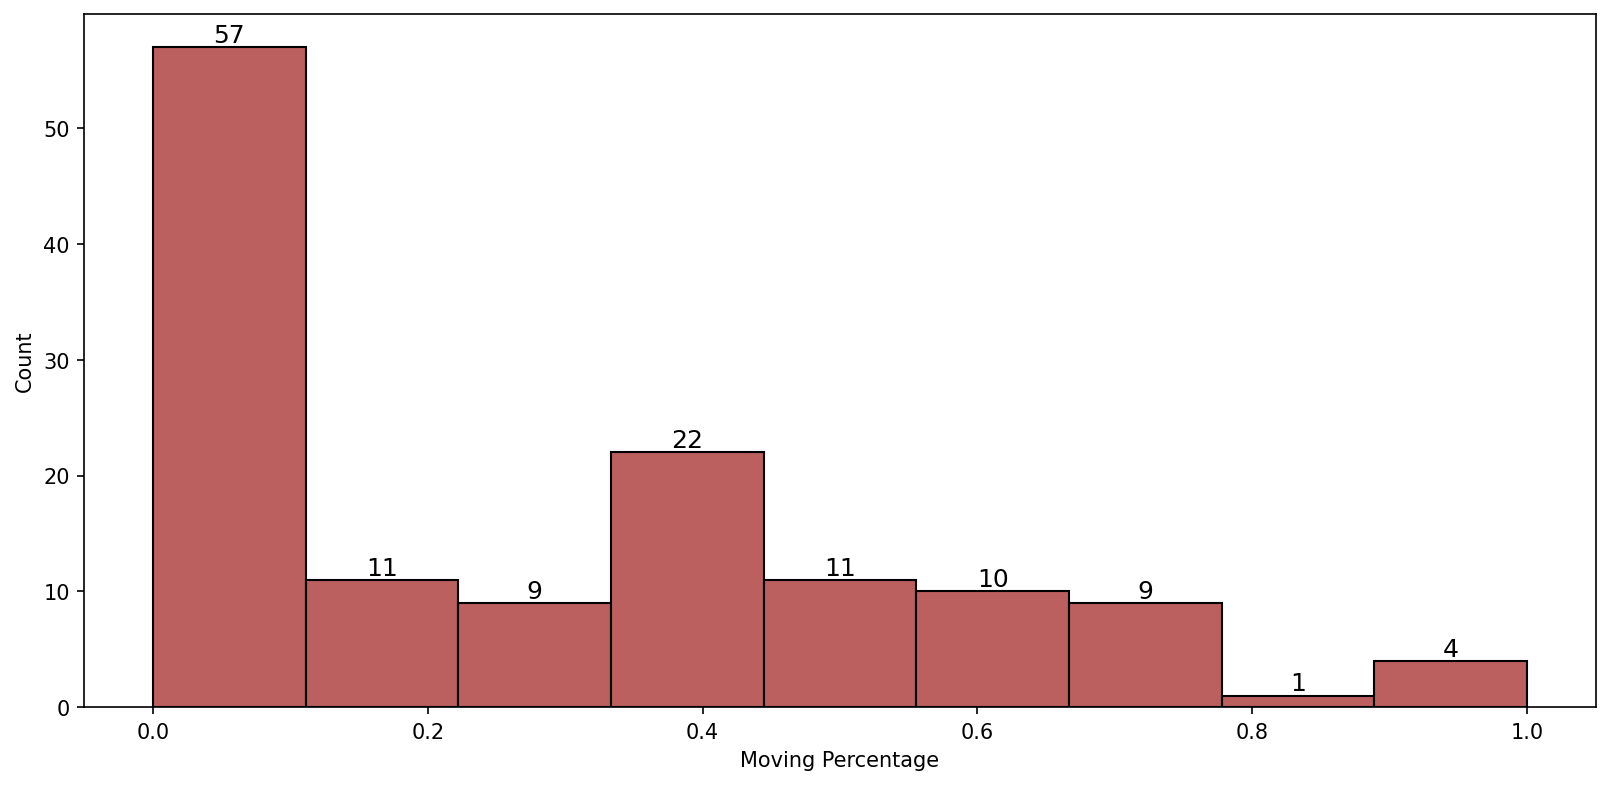

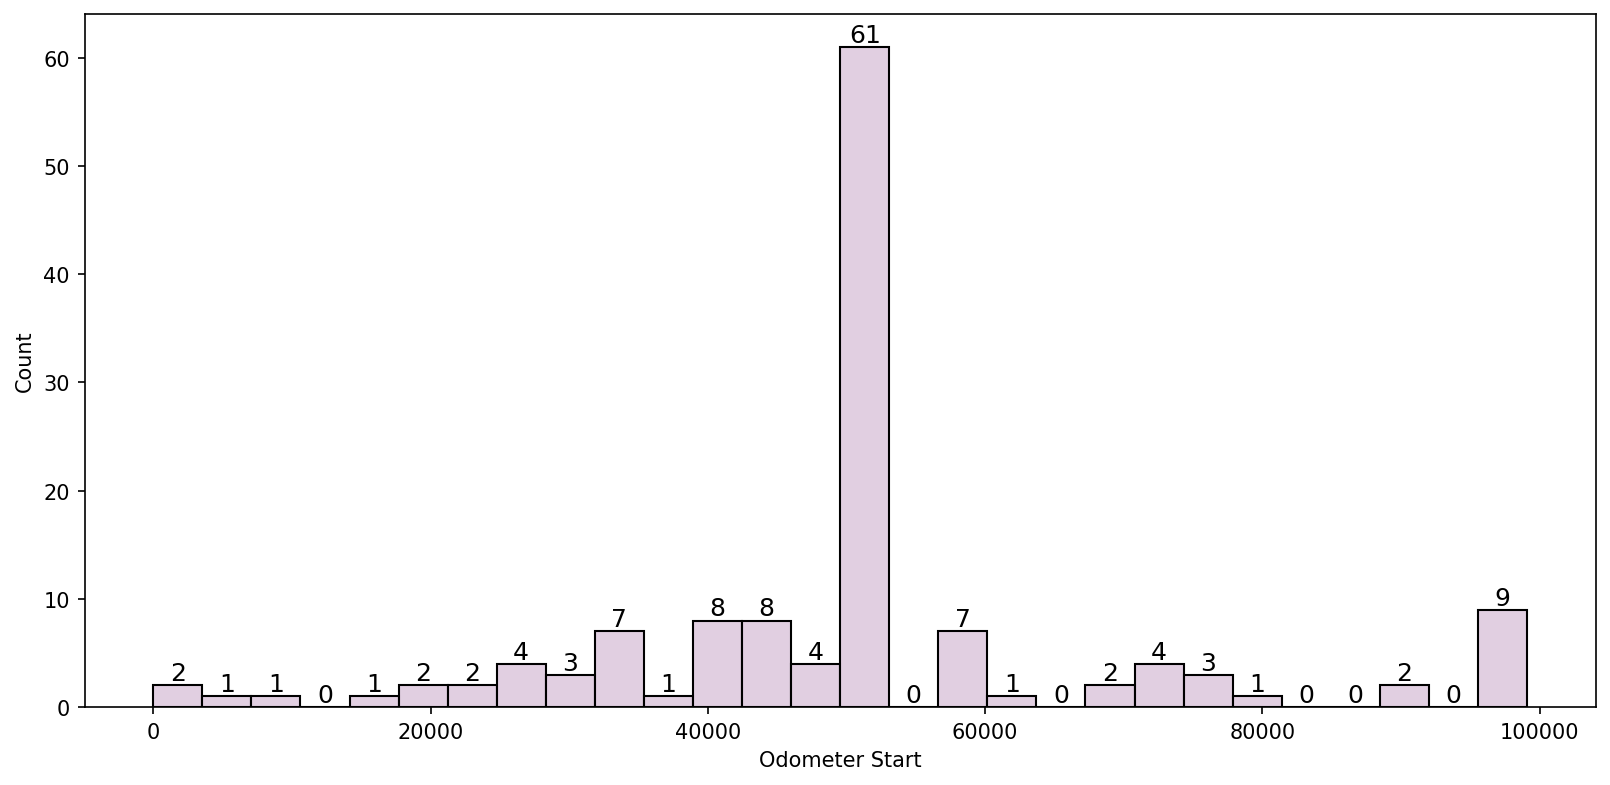

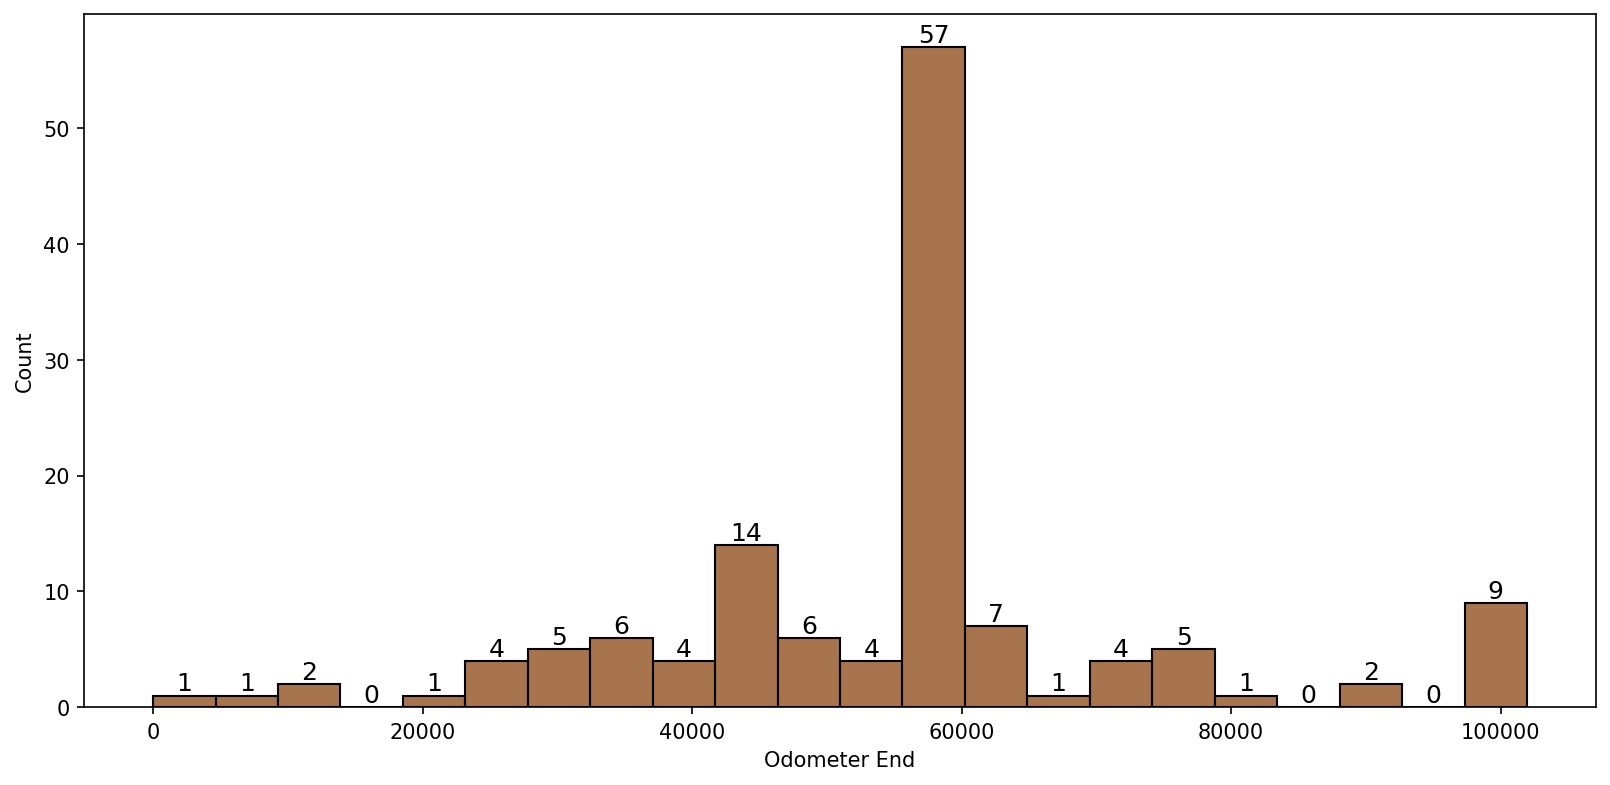

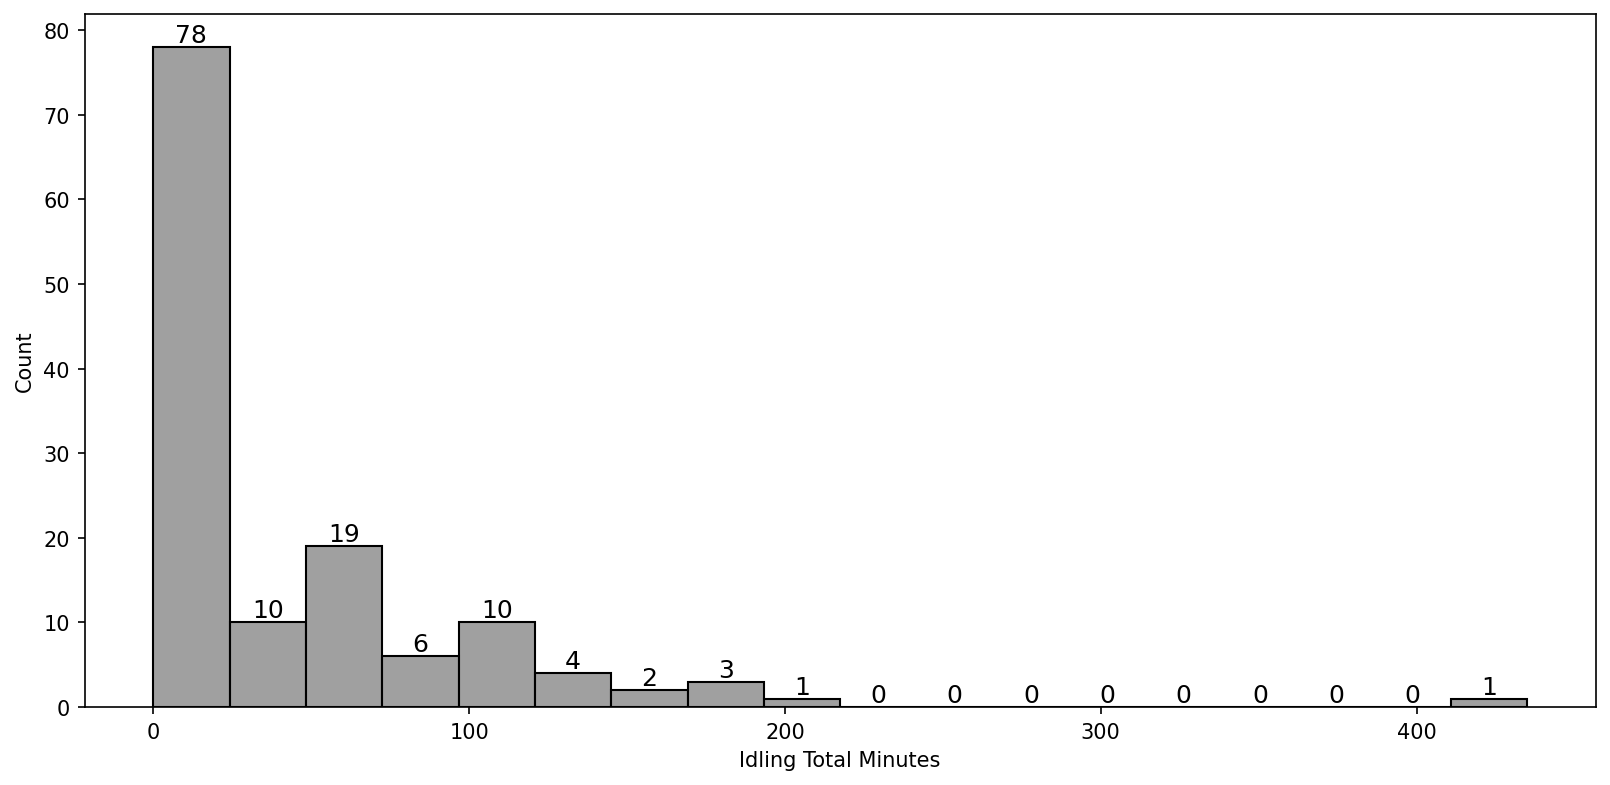

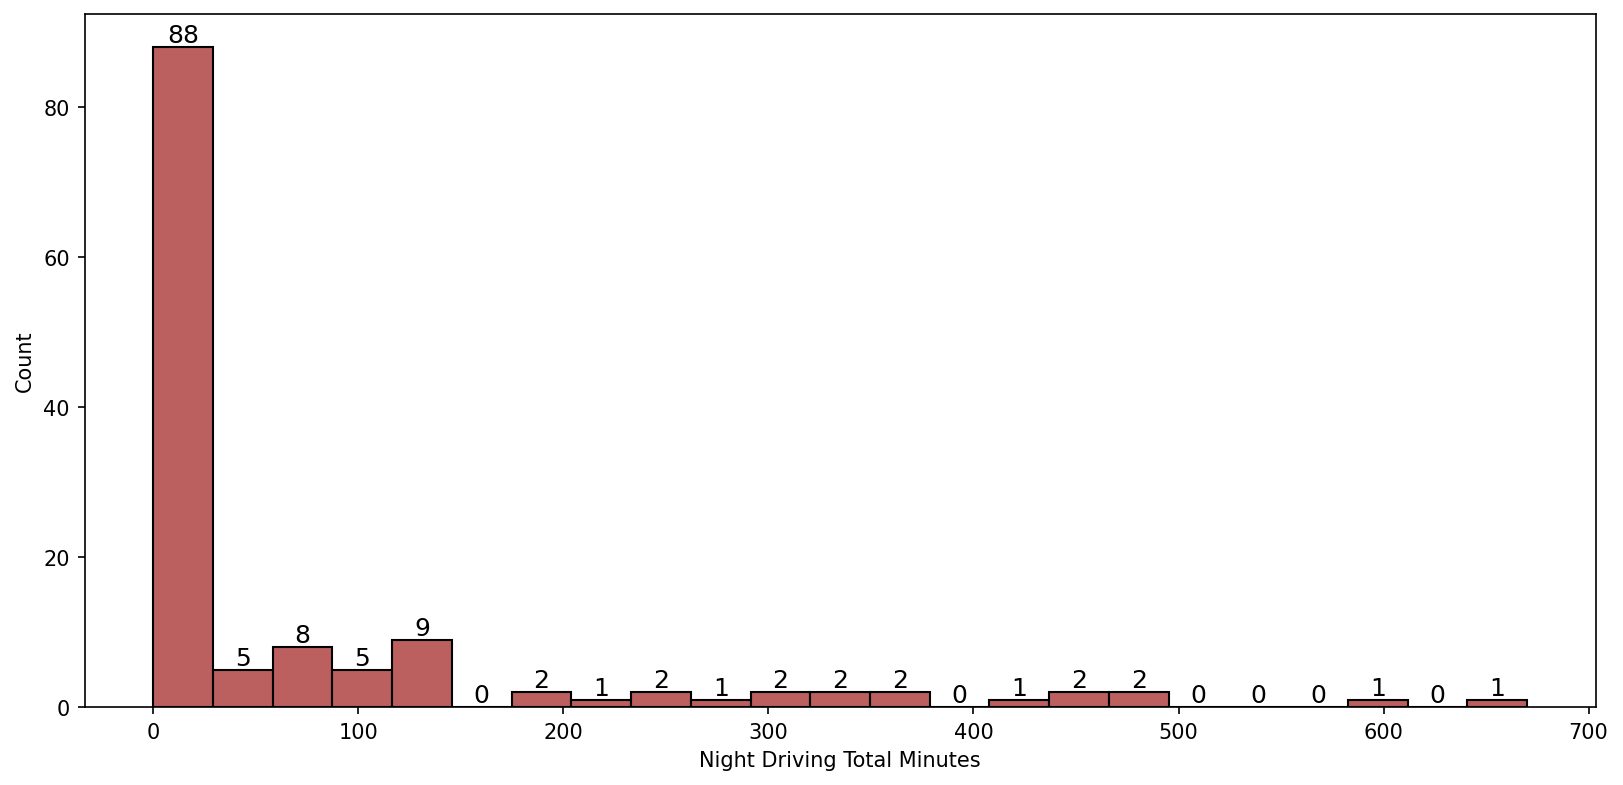

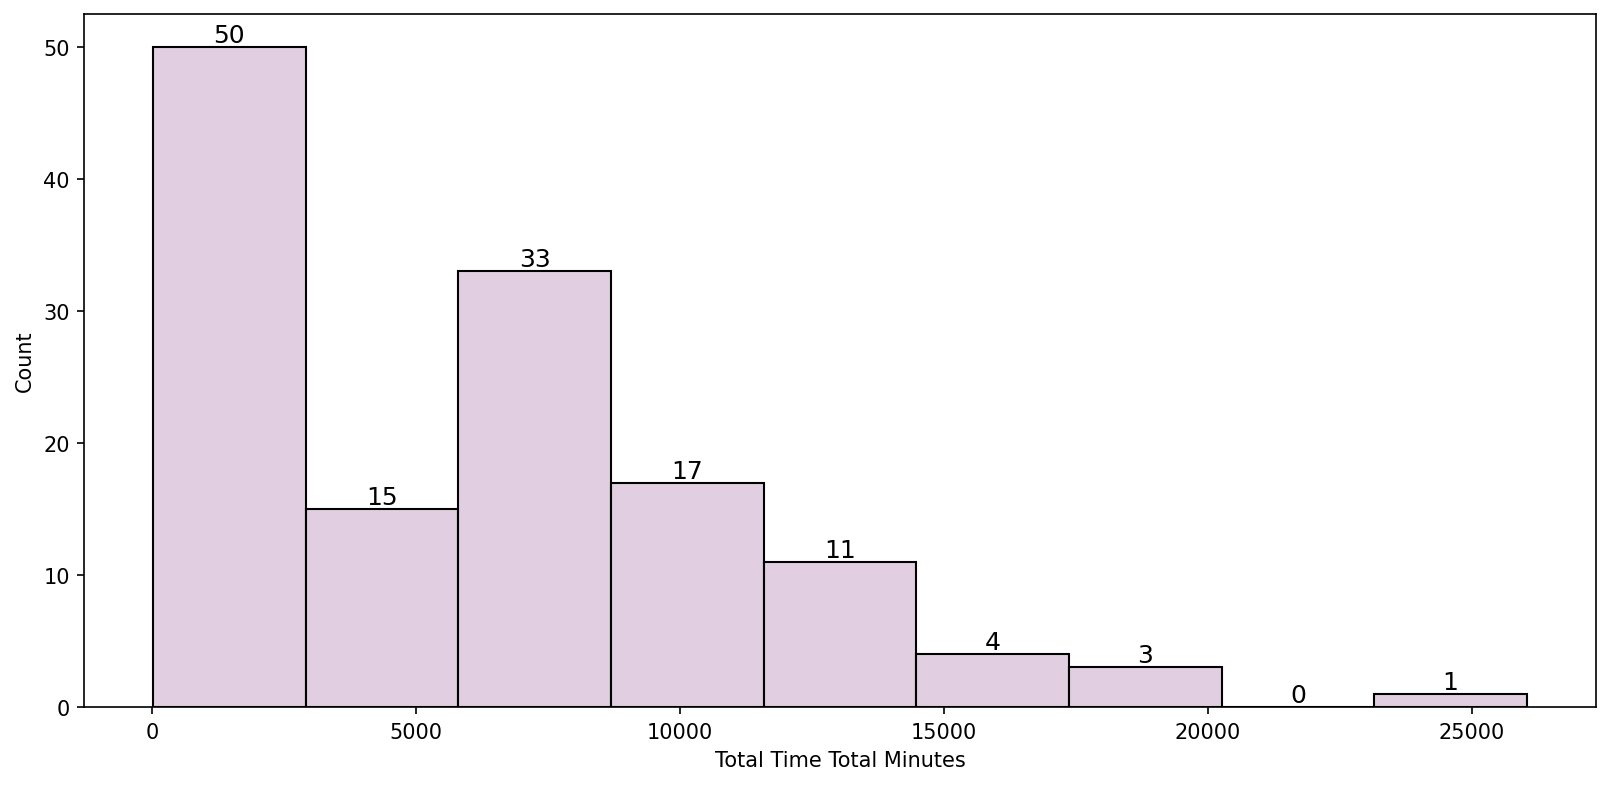

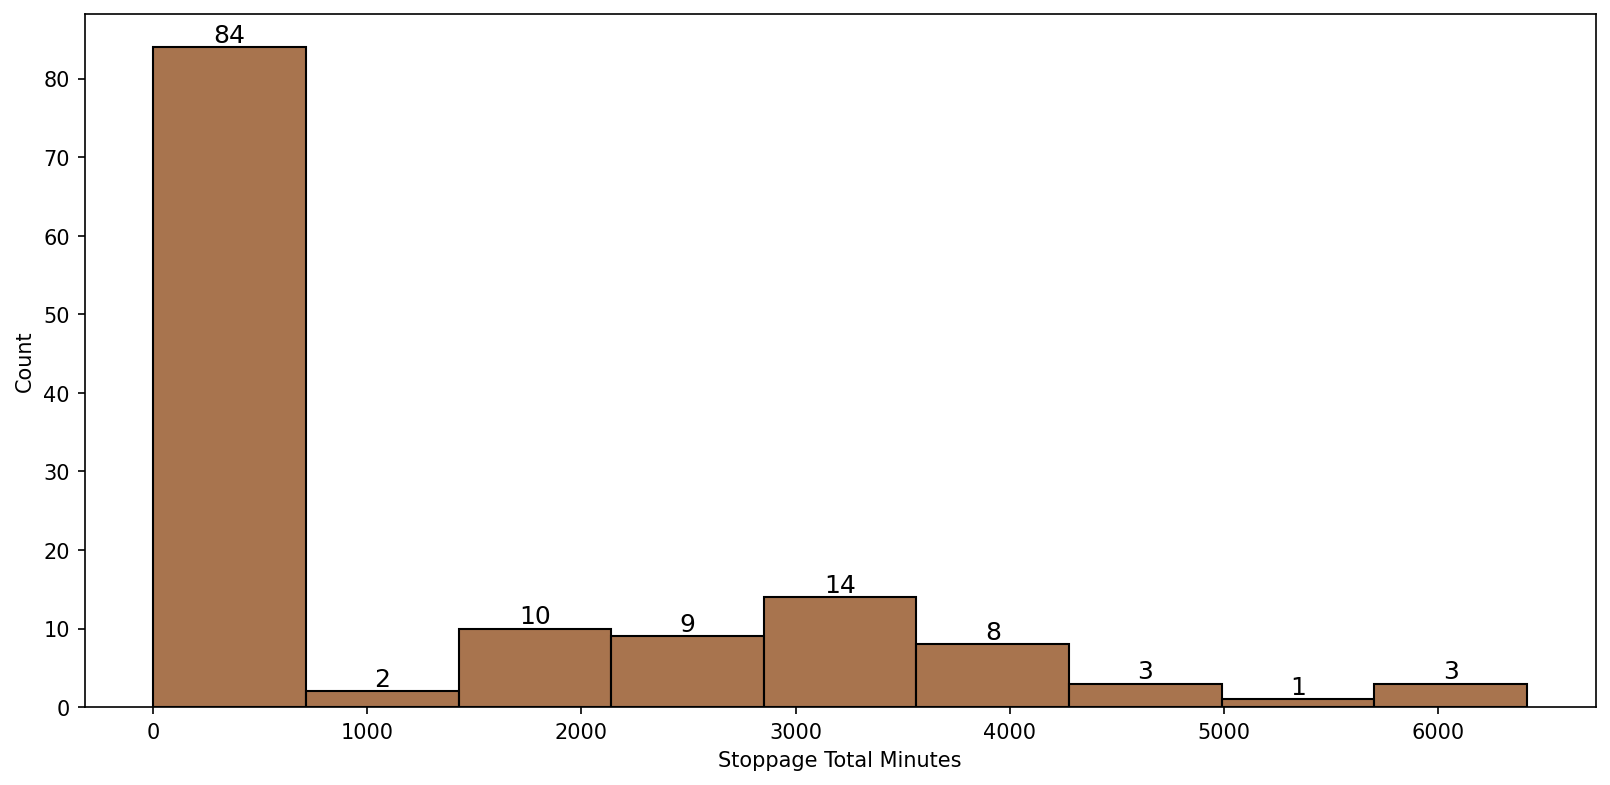

In [591]:
color_set = ['grey','brown','Thistle', 'SaddleBrown', 'grey','brown','Thistle', 'SaddleBrown', 'grey','brown', 'Thistle', 'SaddleBrown']
for colors,col in zip(color_set, numerical_features):
    plt.figure(figsize=(13,6), dpi=150)
    chart1=sns.histplot(data=df_copy_z, x=col, color=colors)
    chart1.bar_label(chart1.containers[0],size=12)
    plt.show()

In [592]:
for column in numerical_features:
    df_copy_z['Log ' + column] = np.log(df_copy_z[column] + 1)

In [593]:
log_numerical_features = [f'Log {feature}' for feature in numerical_features]
print(log_numerical_features)

['Log Odometer', 'Log Harsh Acceleration', 'Log Harsh Braking', 'Log Stopped Percentage', 'Log Idling Percentage', 'Log Moving Percentage', 'Log Odometer Start', 'Log Odometer End', 'Log Idling Total Minutes', 'Log Night Driving Total Minutes', 'Log Total Time Total Minutes', 'Log Stoppage Total Minutes', 'Log Fuel Efficiency', 'Log Distance Driven (Kms)', 'Log Fuel Consumed']


Log Odometer


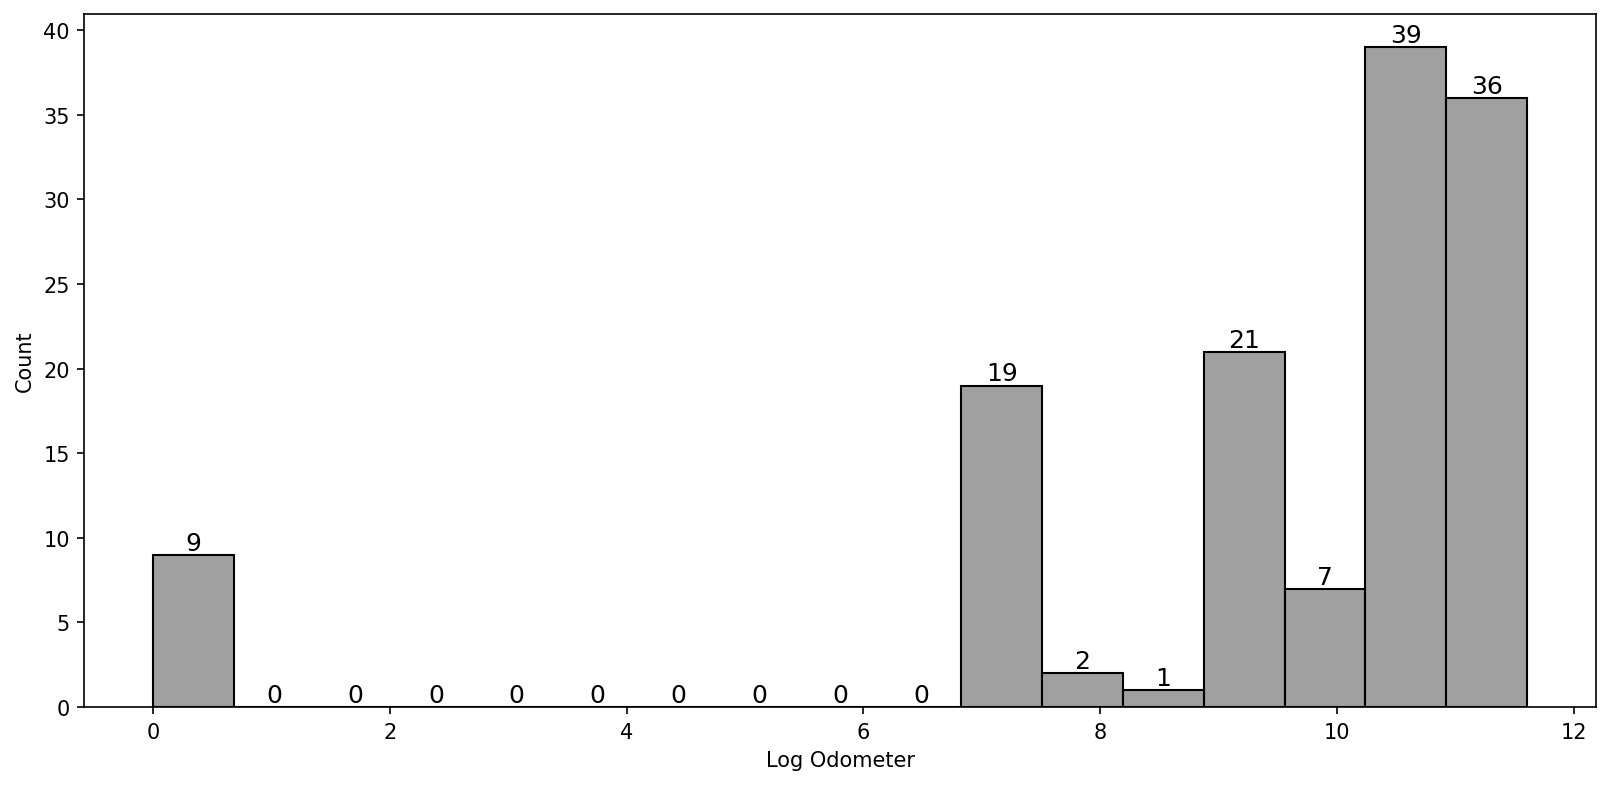

Log Harsh Acceleration


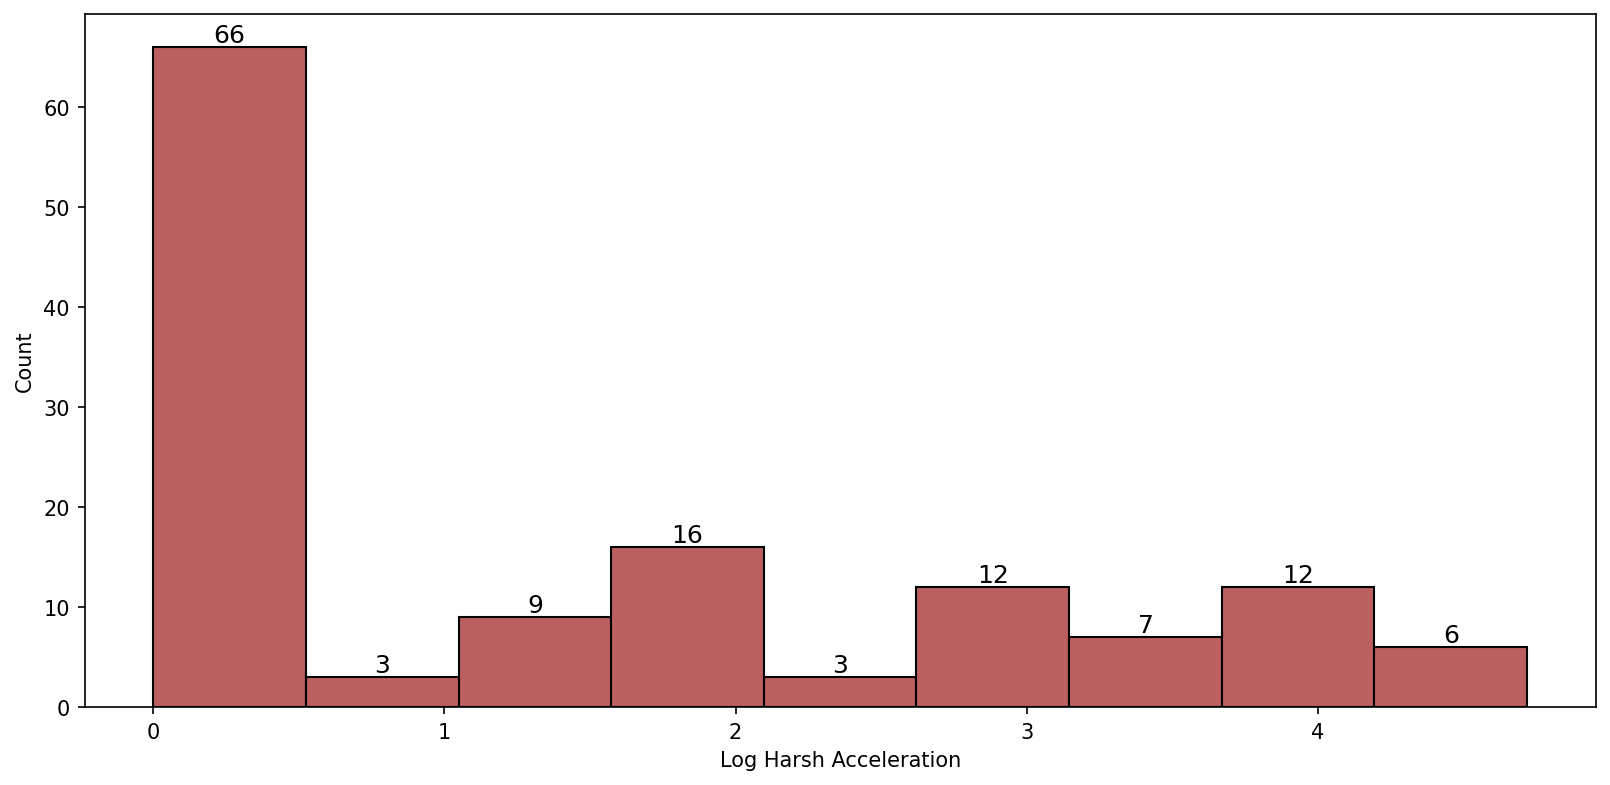

Log Harsh Braking


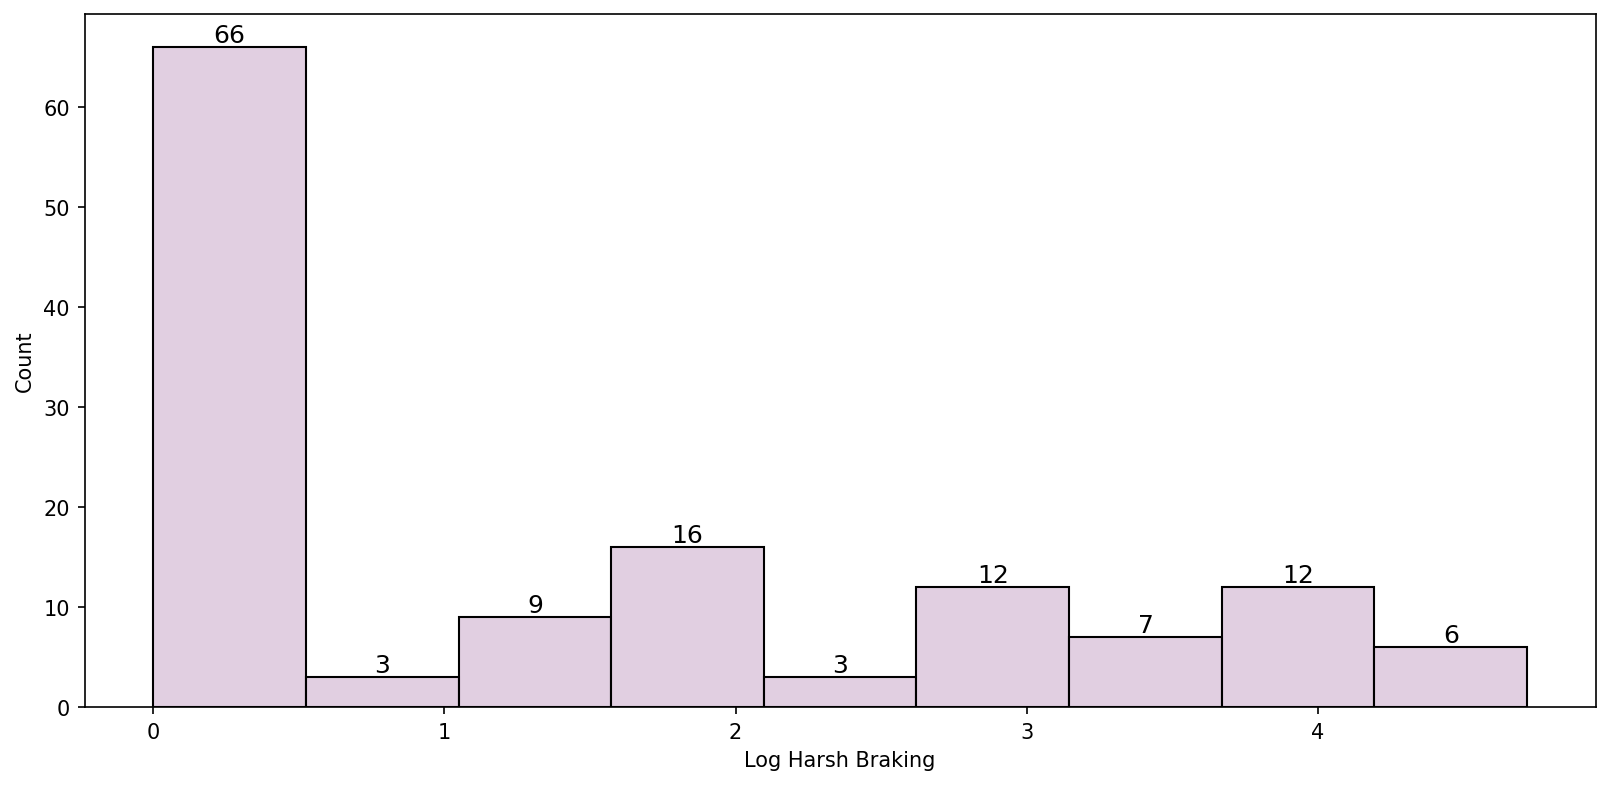

Log Stopped Percentage


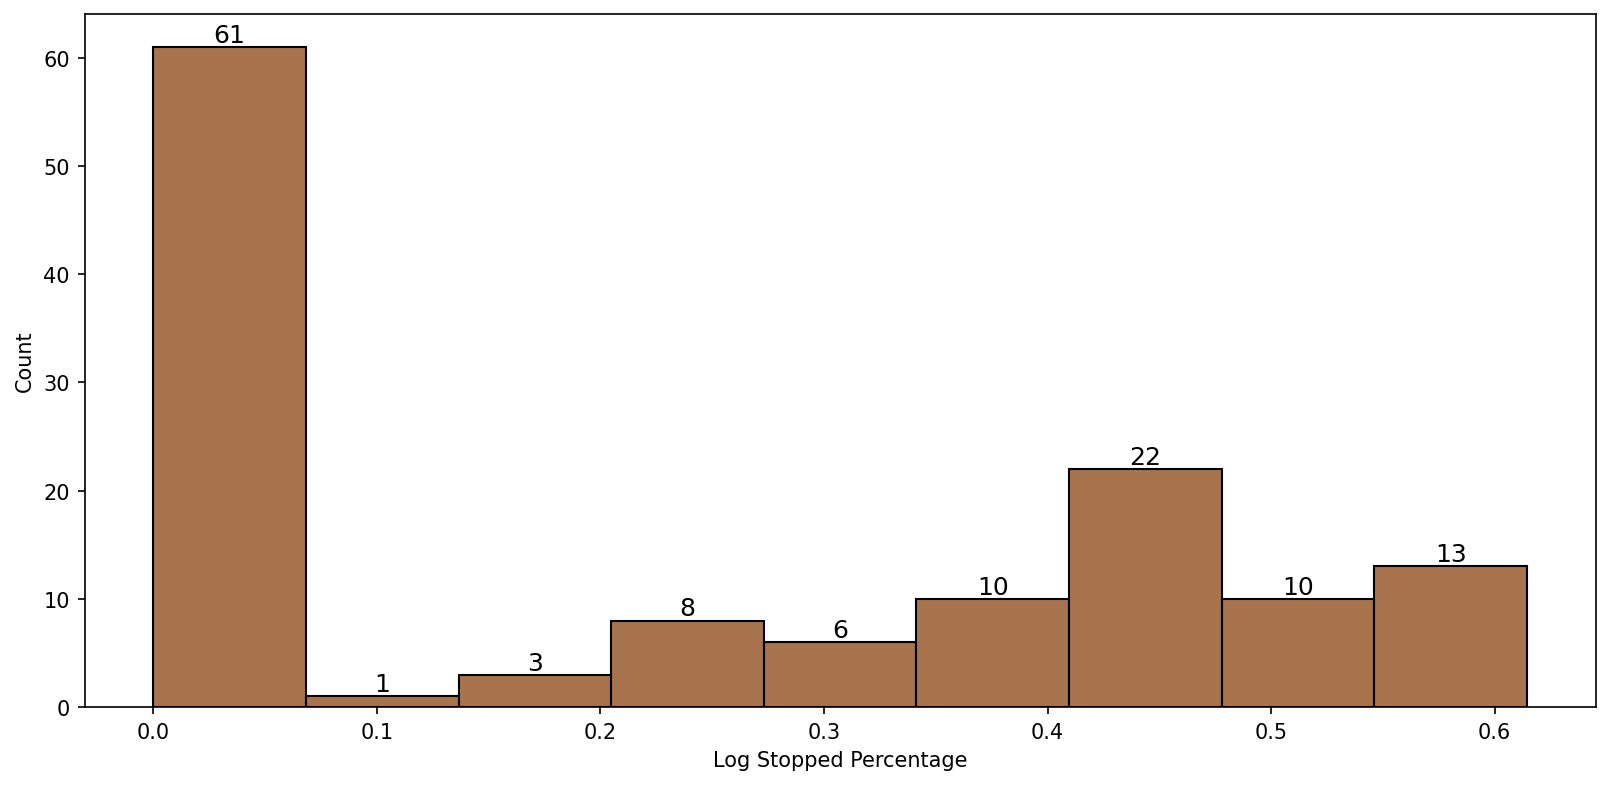

Log Idling Percentage


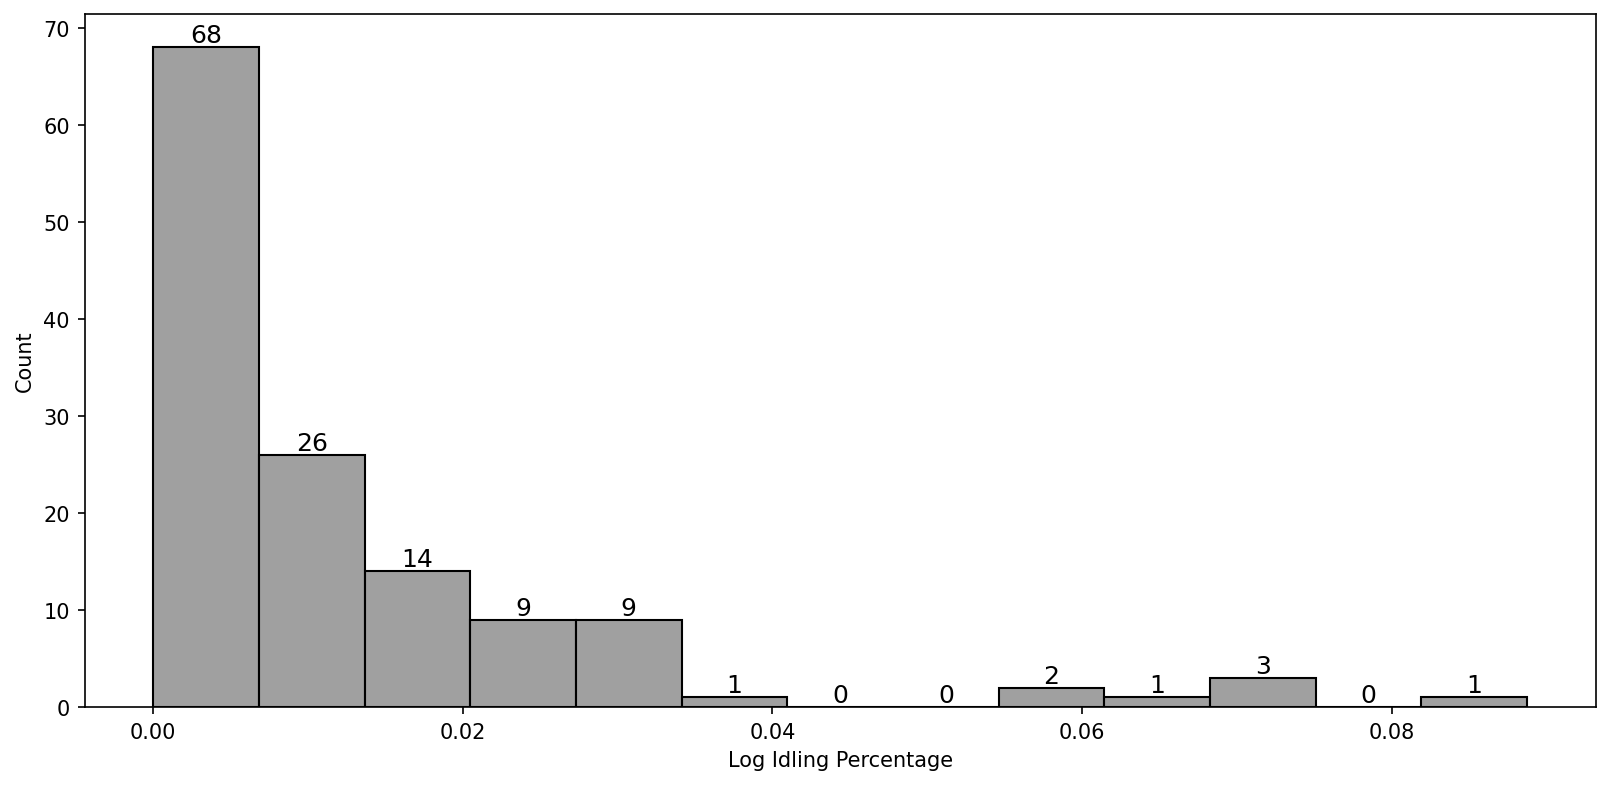

Log Moving Percentage


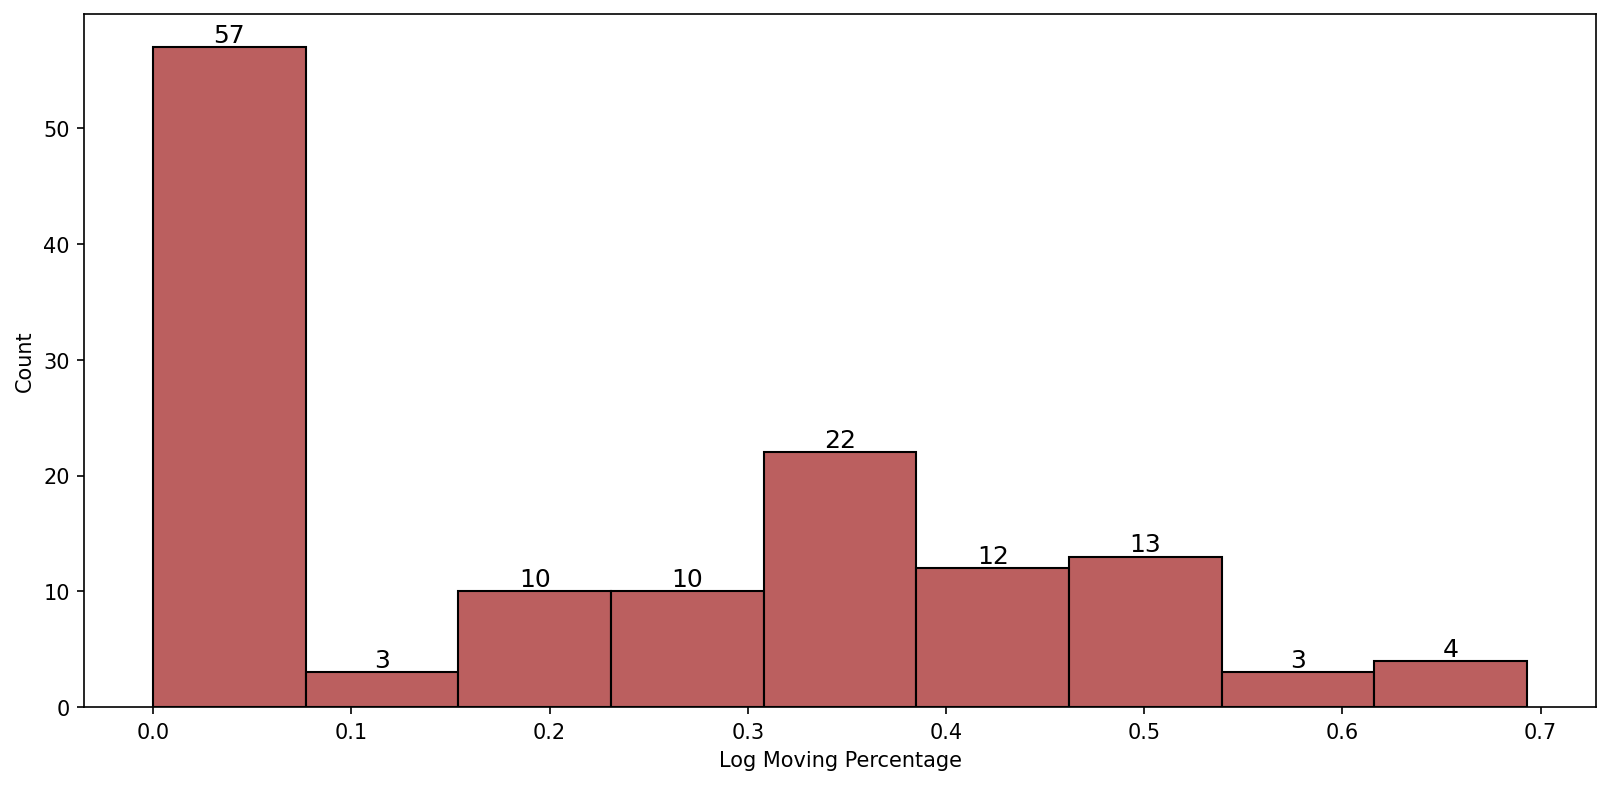

Log Odometer Start


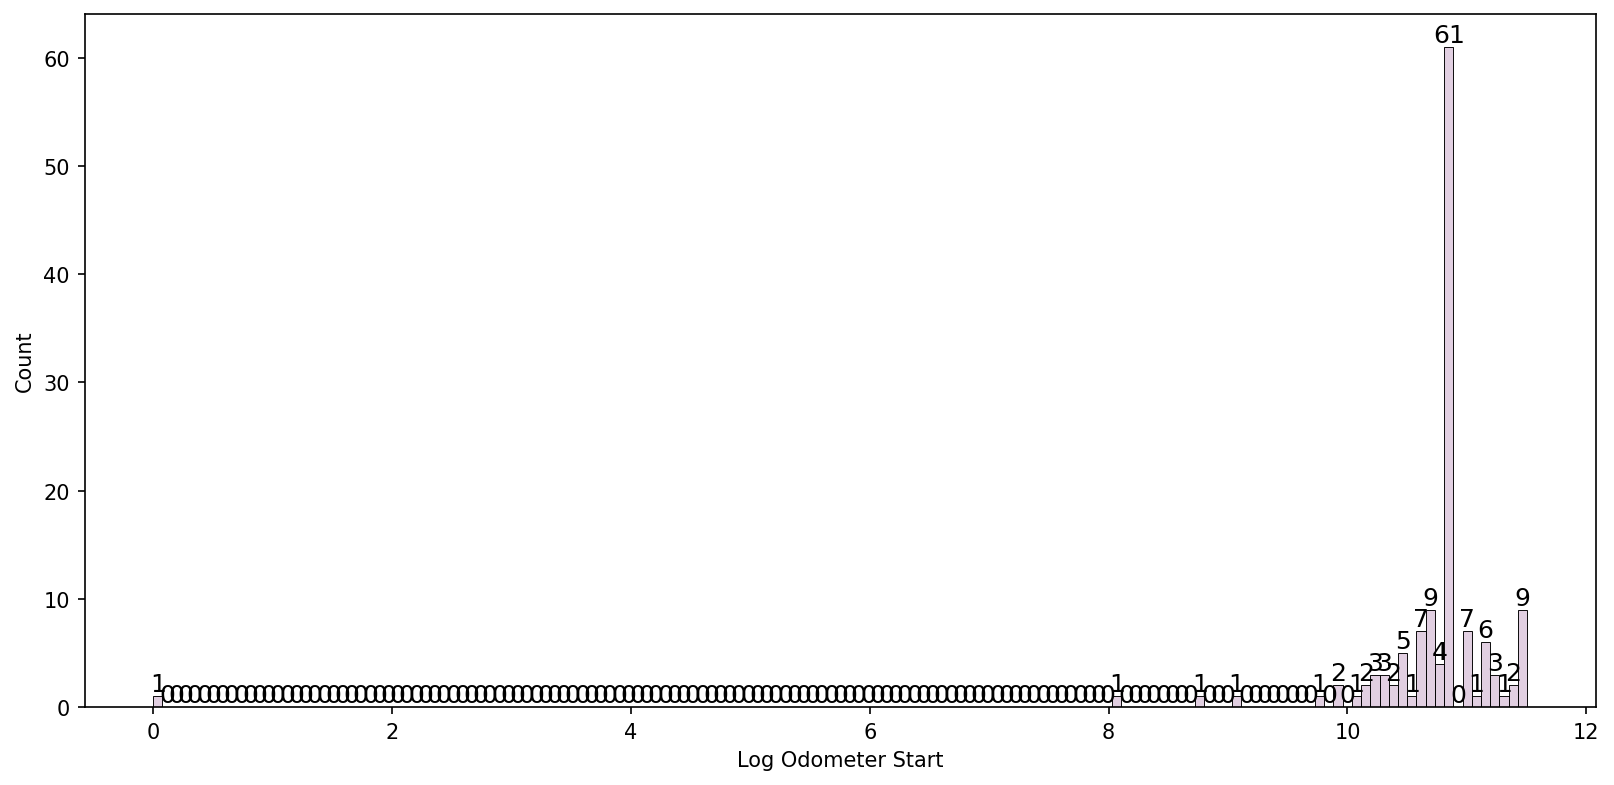

Log Odometer End


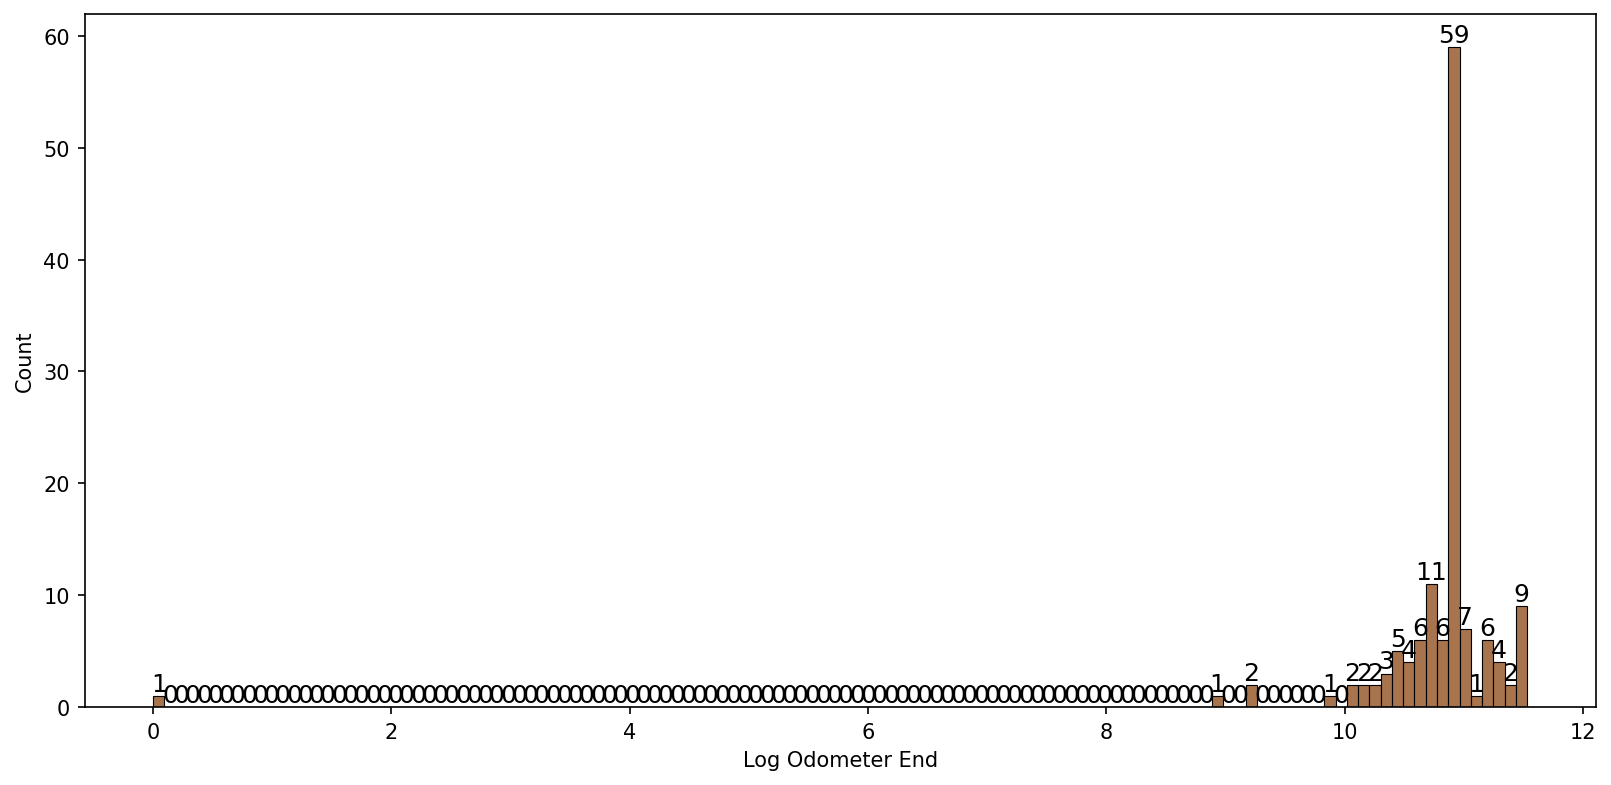

Log Idling Total Minutes


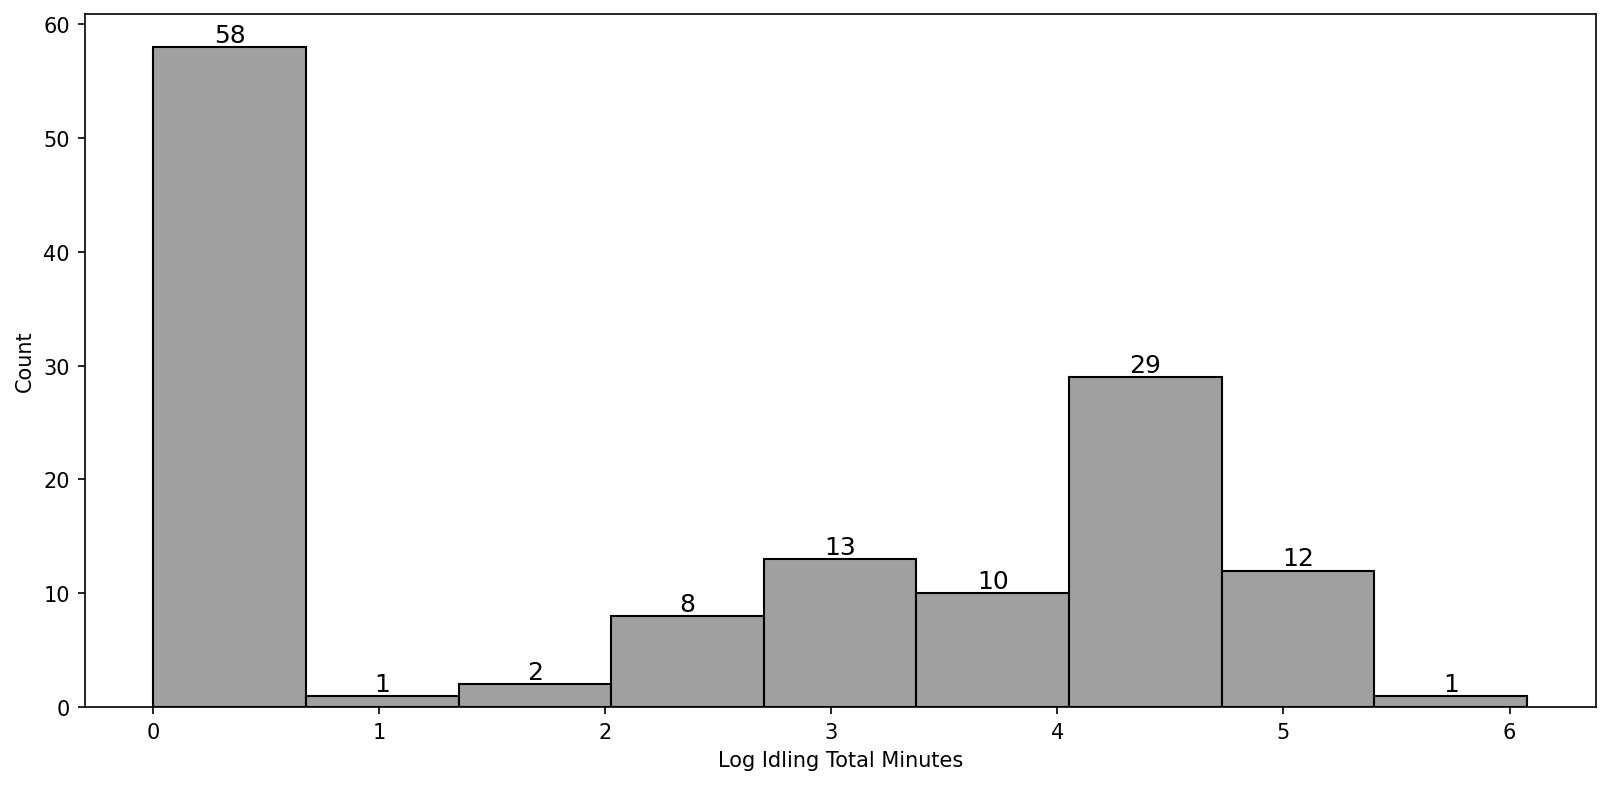

Log Night Driving Total Minutes


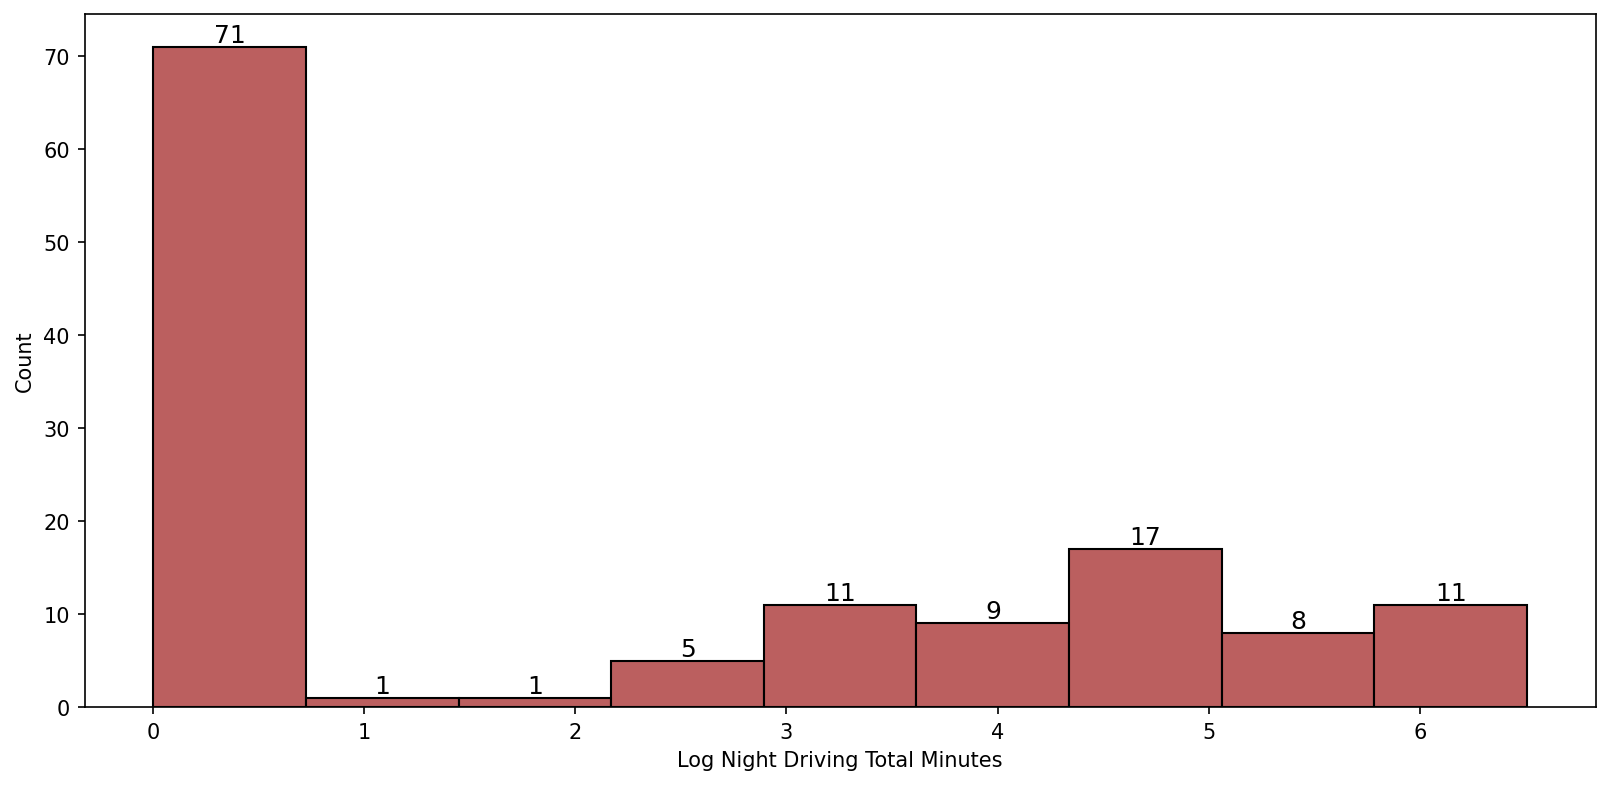

Log Total Time Total Minutes


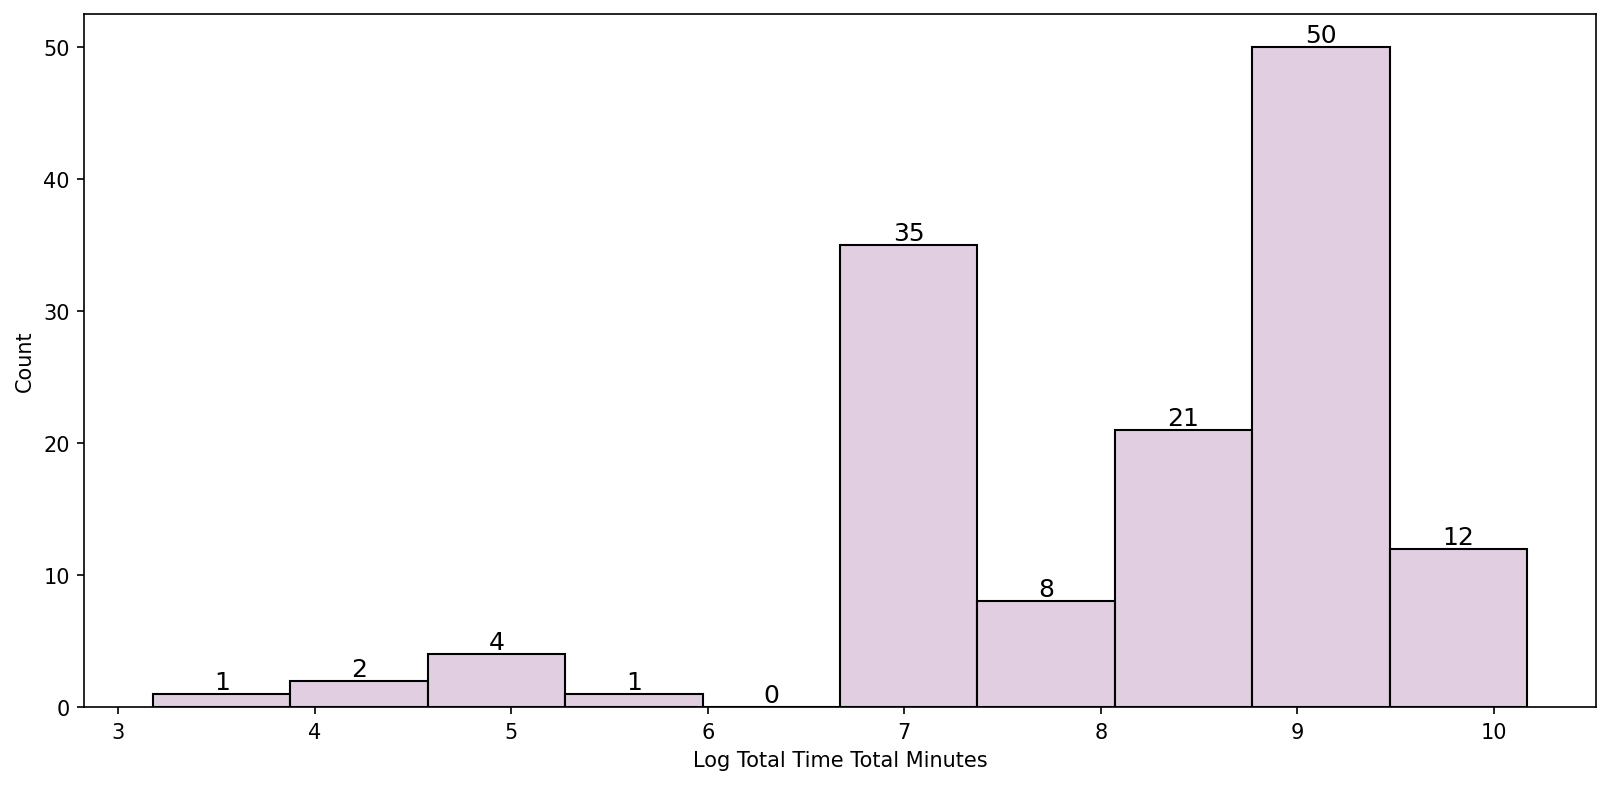

Log Stoppage Total Minutes


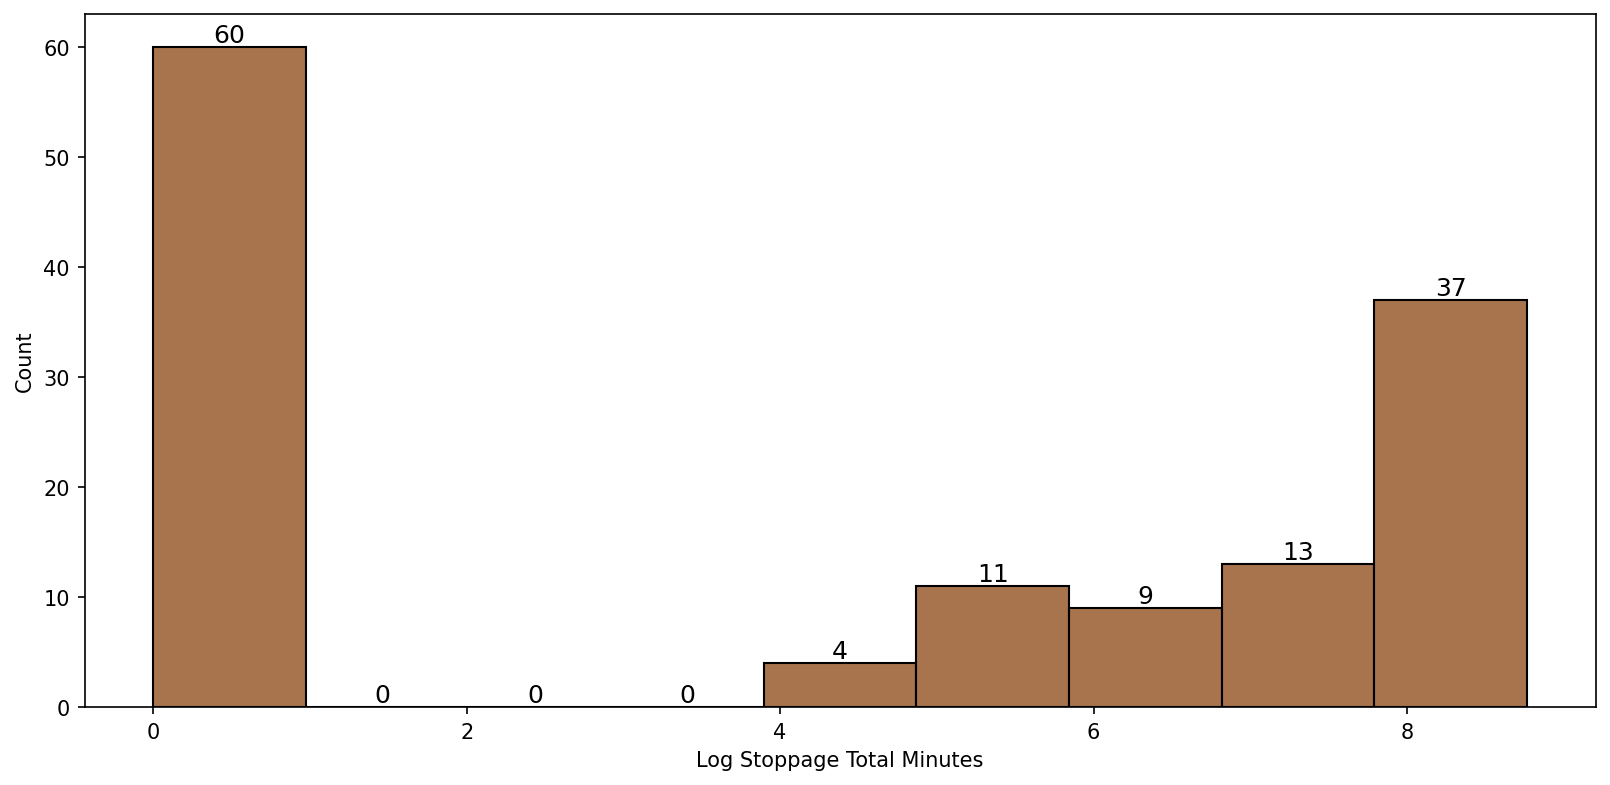

In [594]:
color_set_new = ['grey','brown','Thistle', 'SaddleBrown', 'grey', 'brown', 'Thistle', 'SaddleBrown', 'grey','brown', 'Thistle', 'SaddleBrown']
for colors,col in zip(color_set_new, log_numerical_features):
    print(col)
    plt.figure(figsize=(13,6), dpi=150)
    chart1=sns.histplot(data=df_copy_z, x=col, color=colors)
    chart1.bar_label(chart1.containers[0],size=12)
    plt.show()

In [595]:
# Dropping the specified numerical features
df_copy_z.drop(columns=numerical_features, inplace=True)

In [596]:
# Function to remove 'Log ' prefix
def remove_log_prefix(df_copy_z):
    new_columns = {col: col[4:] if col.startswith('Log ') else col for col in df_copy_z.columns}
    return df_copy_z.rename(columns=new_columns)

# Apply the function to the DataFrame
df_copy_z = remove_log_prefix(df_copy_z)

In [597]:
# Drop rows where the 'Fuel Type' is 'Electric'
df_copy_z = df_copy_z[df_copy_z['Fuel Type'].str.lower() != 'electric']

In [598]:
df_fuel_type = df_copy_z['Fuel Type'].str.get_dummies()
df_model_type = df_copy_z['Model Type'].str.get_dummies()

In [600]:
df_copy_z = pd.concat([df_copy_z, df_fuel_type], axis =1)
df_copy_z = pd.concat([df_copy_z, df_model_type], axis =1)

In [601]:
df_copy_z = df_copy_z.drop(['Model Type', 'Fuel Type'], axis = 1)

In [602]:
df_copy_z.reset_index(drop=True, inplace=True)

In [603]:
df_final = df_copy_z

In [604]:
df_final.columns

Index(['Odometer', 'Harsh Acceleration', 'Harsh Braking', 'Stopped Percentage',
       'Idling Percentage', 'Moving Percentage', 'Odometer Start',
       'Odometer End', 'Idling Total Minutes', 'Night Driving Total Minutes',
       'Total Time Total Minutes', 'Stoppage Total Minutes', 'Fuel Efficiency',
       'Distance Driven (Kms)', 'Fuel Consumed', 'CNG', 'Diesel', 'LNG',
       '3518TC', '4225TC', '5525.S', 'LPS5525TC 4x2', 'LPS5530TC', 'LPT 3518',
       'LPT 4225'],
      dtype='object')

In [605]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Odometer                     97 non-null     float64
 1   Harsh Acceleration           97 non-null     float64
 2   Harsh Braking                97 non-null     float64
 3   Stopped Percentage           97 non-null     float64
 4   Idling Percentage            97 non-null     float64
 5   Moving Percentage            97 non-null     float64
 6   Odometer Start               97 non-null     float64
 7   Odometer End                 97 non-null     float64
 8   Idling Total Minutes         97 non-null     float64
 9   Night Driving Total Minutes  97 non-null     float64
 10  Total Time Total Minutes     97 non-null     float64
 11  Stoppage Total Minutes       97 non-null     float64
 12  Fuel Efficiency              97 non-null     float64
 13  Distance Driven (Kms) 

In [606]:
df_final.head()

Odometer  Harsh Acceleration  Harsh Braking  Stopped Percentage  \
0   0.000000            3.555348       3.555348            0.465556   
1   9.399389            3.496508       3.496508            0.565427   
2  10.876007            1.609438       1.609438            0.528744   
3  10.607105            3.091042       3.091042            0.517781   
4  10.896721            3.401197       3.401197            0.440060   

   Idling Percentage  Moving Percentage  Odometer Start  Odometer End  \
0           0.024205           0.323893       10.988111     11.020848   
1           0.011632           0.205468        8.092576      8.968651   
2           0.015480           0.252780       10.657172     10.713026   
3           0.008762           0.272238       10.468205     10.510685   
4           0.010742           0.362140       10.718713     10.774994   

   Idling Total Minutes  Night Driving Total Minutes  ...  CNG  Diesel  LNG  \
0              3.737670                     2.197225  ...    0       1    0   
1              5.293305                     2.197225  ...    0       1    0   
2              3.912023                     2.197225  ...    0       1    0   
3              4.094345                     5.468060  ...    0       1    0   
4              3.295837                     6.013715  ...    0       1    0   

   3518TC  4225TC  5525.S  LPS5525TC 4x2  LPS5530TC  LPT 3518  LPT 4225  
0       0       0       0              0          0         1         0  
1       0       1       0              0          0         0         0  
2       1       0       0              0          0         0         0  
3       1       0       0              0          0         0         0  
4       1       0       0              0          0         0         0  

[5 rows x 25 columns]

## 5. Feature Selection

In [739]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [736]:
# Create a contingency table
contingency_table = pd.crosstab(df['Fuel Type'], df['Model Type'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequencies Table:\n{expected}')

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Fuel Type and Model Type.")
else:
    print("Fail to reject the null hypothesis: No significant association between Fuel Type and Model Type.")

Chi2 Statistic: 47.57782280346289
p-value: 0.0001739207454880514
Degrees of Freedom: 18
Expected Frequencies Table:
[[1.62804878e+00 1.64634146e-01 3.29268293e-01 5.48780488e-02
  2.92682927e-01 3.84146341e-01 1.46341463e-01]
 [6.62073171e+01 6.69512195e+00 1.33902439e+01 2.23170732e+00
  1.19024390e+01 1.56219512e+01 5.95121951e+00]
 [2.00792683e+01 2.03048780e+00 4.06097561e+00 6.76829268e-01
  3.60975610e+00 4.73780488e+00 1.80487805e+00]
 [1.08536585e+00 1.09756098e-01 2.19512195e-01 3.65853659e-02
  1.95121951e-01 2.56097561e-01 9.75609756e-02]]
Reject the null hypothesis: There is a significant association between Fuel Type and Model Type.


In [738]:
# Group data by Method
grouped_data = [group['Fuel Efficiency'].values for name, group in df.groupby('Fuel Type')]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print(f'F-statistic: {f_statistic}')
print(f'p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between the group means.")
else:
    print("Fail to reject the null hypothesis: No significant differences between the group means.")

F-statistic: 3.105794341467058e-30
p-value: 1.0
Fail to reject the null hypothesis: No significant differences between the group means.


In [740]:
# Calculate Pearson correlation matrix
correlation_matrix = df_final.corr()

# Extract correlation of features with the target variable
target_correlation = correlation_matrix['Fuel Efficiency']

print(target_correlation)

Odometer                      -0.058763
Harsh Acceleration            -0.090567
Harsh Braking                 -0.090567
Stopped Percentage             0.031618
Idling Percentage             -0.043731
Moving Percentage              0.090778
Odometer Start                 0.215881
Odometer End                   0.227951
Idling Total Minutes           0.156391
Night Driving Total Minutes    0.079663
Total Time Total Minutes      -0.276512
Stoppage Total Minutes         0.217735
Fuel Efficiency                1.000000
Distance Driven (Kms)          0.127830
Fuel Consumed                  0.299674
CNG                            0.011261
Diesel                        -0.014694
LNG                            0.009146
3518TC                        -0.053542
4225TC                         0.123514
5525.S                         0.250298
LPS5525TC 4x2                 -0.336332
LPS5530TC                      0.066645
LPT 3518                      -0.225764
LPT 4225                      -0.032464


<Axes: >

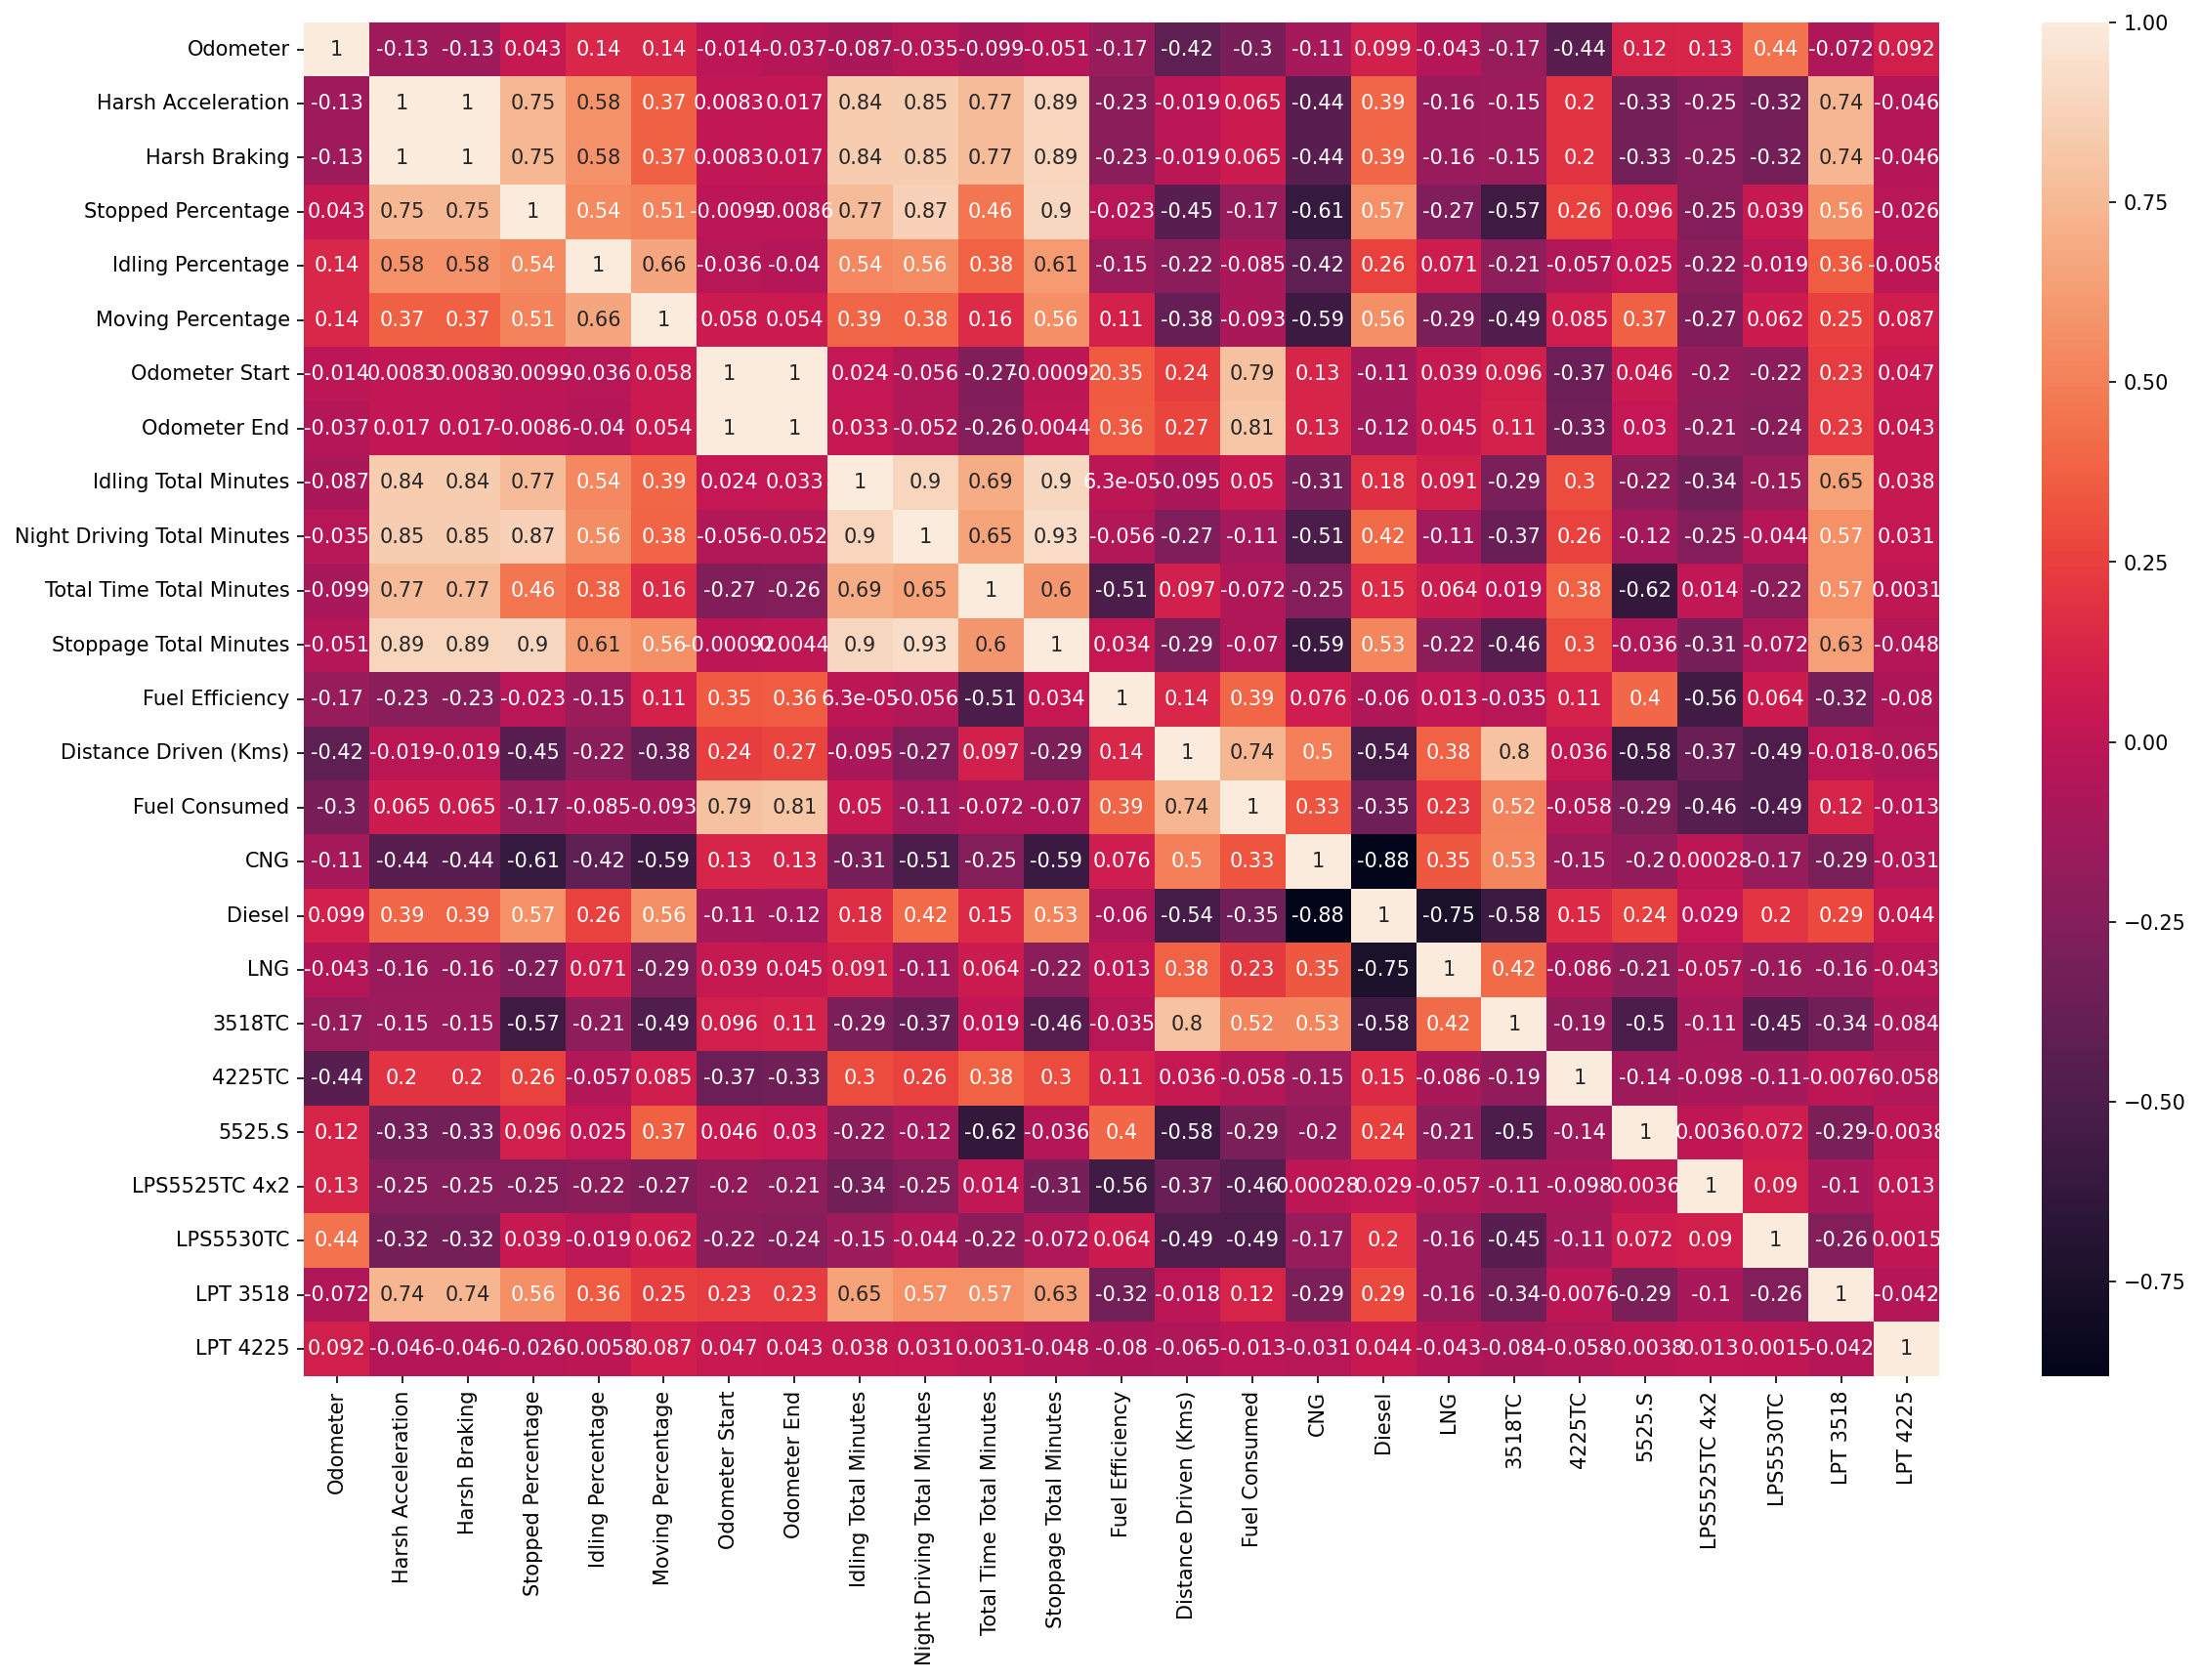

In [609]:
# Calculate the correlation matrix
corr_matrix = df_final.corr()

# Create a mask for correlations below the threshold
threshold = 0.8
mask = np.abs(corr_matrix) < threshold

# Apply the mask to the correlation matrix
filtered_corr_matrix = corr_matrix.mask(mask)

plt.figure(figsize=(18,12), dpi=150)
sns.heatmap(corr_matrix.corr(),annot=True)


In [742]:
df_final.columns

Index(['Odometer', 'Harsh Acceleration', 'Harsh Braking', 'Stopped Percentage',
       'Idling Percentage', 'Moving Percentage', 'Odometer Start',
       'Odometer End', 'Idling Total Minutes', 'Night Driving Total Minutes',
       'Total Time Total Minutes', 'Stoppage Total Minutes', 'Fuel Efficiency',
       'Distance Driven (Kms)', 'Fuel Consumed', 'CNG', 'Diesel', 'LNG',
       '3518TC', '4225TC', '5525.S', 'LPS5525TC 4x2', 'LPS5530TC', 'LPT 3518',
       'LPT 4225'],
      dtype='object')

In [743]:
# Feature selection using Correlation. Dropping highly correlated features.
df_final_copy = df_final.drop(['Harsh Braking', 'Odometer End', 'Night Driving Total Minutes',
                               'Stoppage Total Minutes', 'Stopped Percentage', 'Idling Percentage'], axis = 1)

In [744]:
X = df_final_copy.drop(['Fuel Efficiency'], axis = 1)
y = df_final_copy['Fuel Efficiency']

In [745]:
X.head()

Odometer  Harsh Acceleration  Moving Percentage  Odometer Start  \
0   0.000000            3.555348           0.323893       10.988111   
1   9.399389            3.496508           0.205468        8.092576   
2  10.876007            1.609438           0.252780       10.657172   
3  10.607105            3.091042           0.272238       10.468205   
4  10.896721            3.401197           0.362140       10.718713   

   Idling Total Minutes  Total Time Total Minutes  Distance Driven (Kms)  \
0              3.737670                  9.051696               7.839526   
1              5.293305                  9.826066               9.013498   
2              3.912023                  8.900004               7.978482   
3              4.094345                  8.888895               7.658322   
4              3.295837                  8.889722               8.045268   

   Fuel Consumed  CNG  Diesel  LNG  3518TC  4225TC  5525.S  LPS5525TC 4x2  \
0       6.719013    0       1    0       0       0       0              0   
1       7.428927    0       1    0       0       1       0              0   
2       6.618071    0       1    0       1       0       0              0   
3       6.470800    0       1    0       1       0       0              0   
4       6.778785    0       1    0       1       0       0              0   

   LPS5530TC  LPT 3518  LPT 4225  
0          0         1         0  
1          0         0         0  
2          0         0         0  
3          0         0         0  
4          0         0         0

In [746]:
y.head().to_frame()

Fuel Efficiency
0         1.757858
1         1.902108
2         1.902108
3         1.791759
4         1.887070

In [747]:
from sklearn.linear_model import Lasso

# Initialize and train Lasso
model = Lasso(alpha=0.001)
model.fit(X, y)

# Get coefficients
coefficients = model.coef_
features = X.columns

# Create a DataFrame to view feature coefficients
feature_coefficients = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

In [748]:
# Get selected features
selected_features = X.columns[model.coef_ != 0]
print("Selected features:", selected_features)

# Create a new DataFrame with only the selected features
X_selected = X[selected_features]
X_selected

Selected features: Index(['Odometer', 'Harsh Acceleration', 'Moving Percentage',
       'Idling Total Minutes', 'Total Time Total Minutes',
       'Distance Driven (Kms)', 'Fuel Consumed', 'Diesel', '4225TC', '5525.S',
       'LPS5525TC 4x2', 'LPS5530TC', 'LPT 3518'],
      dtype='object')


Odometer  Harsh Acceleration  Moving Percentage  Idling Total Minutes  \
0    0.000000            3.555348           0.323893              3.737670   
1    9.399389            3.496508           0.205468              5.293305   
2   10.876007            1.609438           0.252780              3.912023   
3   10.607105            3.091042           0.272238              4.094345   
4   10.896721            3.401197           0.362140              3.295837   
..        ...                 ...                ...                   ...   
92   8.123854            0.000000           0.000000              1.098612   
93   8.124151            0.000000           0.000000              2.302585   
94  10.755666            0.000000           0.000000              3.871201   
95   9.227886            0.000000           0.000000              5.049856   
96  10.668909            2.079442           0.343590              6.077642   

    Total Time Total Minutes  Distance Driven (Kms)  Fuel Consumed  Diesel  \
0                   9.051696               7.839526       6.719013       1   
1                   9.826066               9.013498       7.428927       1   
2                   8.900004               7.978482       6.618071       1   
3                   8.888895               7.658322       6.470800       1   
4                   8.889722               8.045268       6.778785       1   
..                       ...                    ...            ...     ...   
92                  7.317212               9.365779       7.355185       0   
93                  7.293698               9.365779       7.355185       0   
94                  8.425516               9.365779       7.355185       0   
95                  8.908830               9.365779       7.355185       0   
96                  9.473012               9.365779       7.355185       0   

    4225TC  5525.S  LPS5525TC 4x2  LPS5530TC  LPT 3518  
0        0       0              0          0         1  
1        1       0              0          0         0  
2        0       0              0          0         0  
3        0       0              0          0         0  
4        0       0              0          0         0  
..     ...     ...            ...        ...       ...  
92       0       0              0          0         0  
93       0       0              0          0         0  
94       0       0              0          0         0  
95       0       0              0          0         0  
96       0       0              0          0         0  

[97 rows x 13 columns]

In [771]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_selected, y, test_size= 0.25 , random_state= 20)

## 6. Standarization and Model Selection

In [772]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [773]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [774]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
dt = DecisionTreeRegressor(max_depth=4)
lr = LinearRegression()

## 7. Model Training

### 7.1 Random Forest

In [775]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [776]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}

In [777]:
rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25 , cv = 5 , n_jobs=-1)
rscv.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [778]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'poisson'}

In [843]:
rf = RandomForestRegressor(n_estimators = 80, min_samples_split = 2, max_features = 'log2', max_depth = 10, criterion='poisson')
rf.fit(Xtrain,ytrain)

RandomForestRegressor(criterion='poisson', max_depth=10, max_features='log2',
                      n_estimators=80)

### 7.2 Decission Tree

In [804]:
dt.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=4)

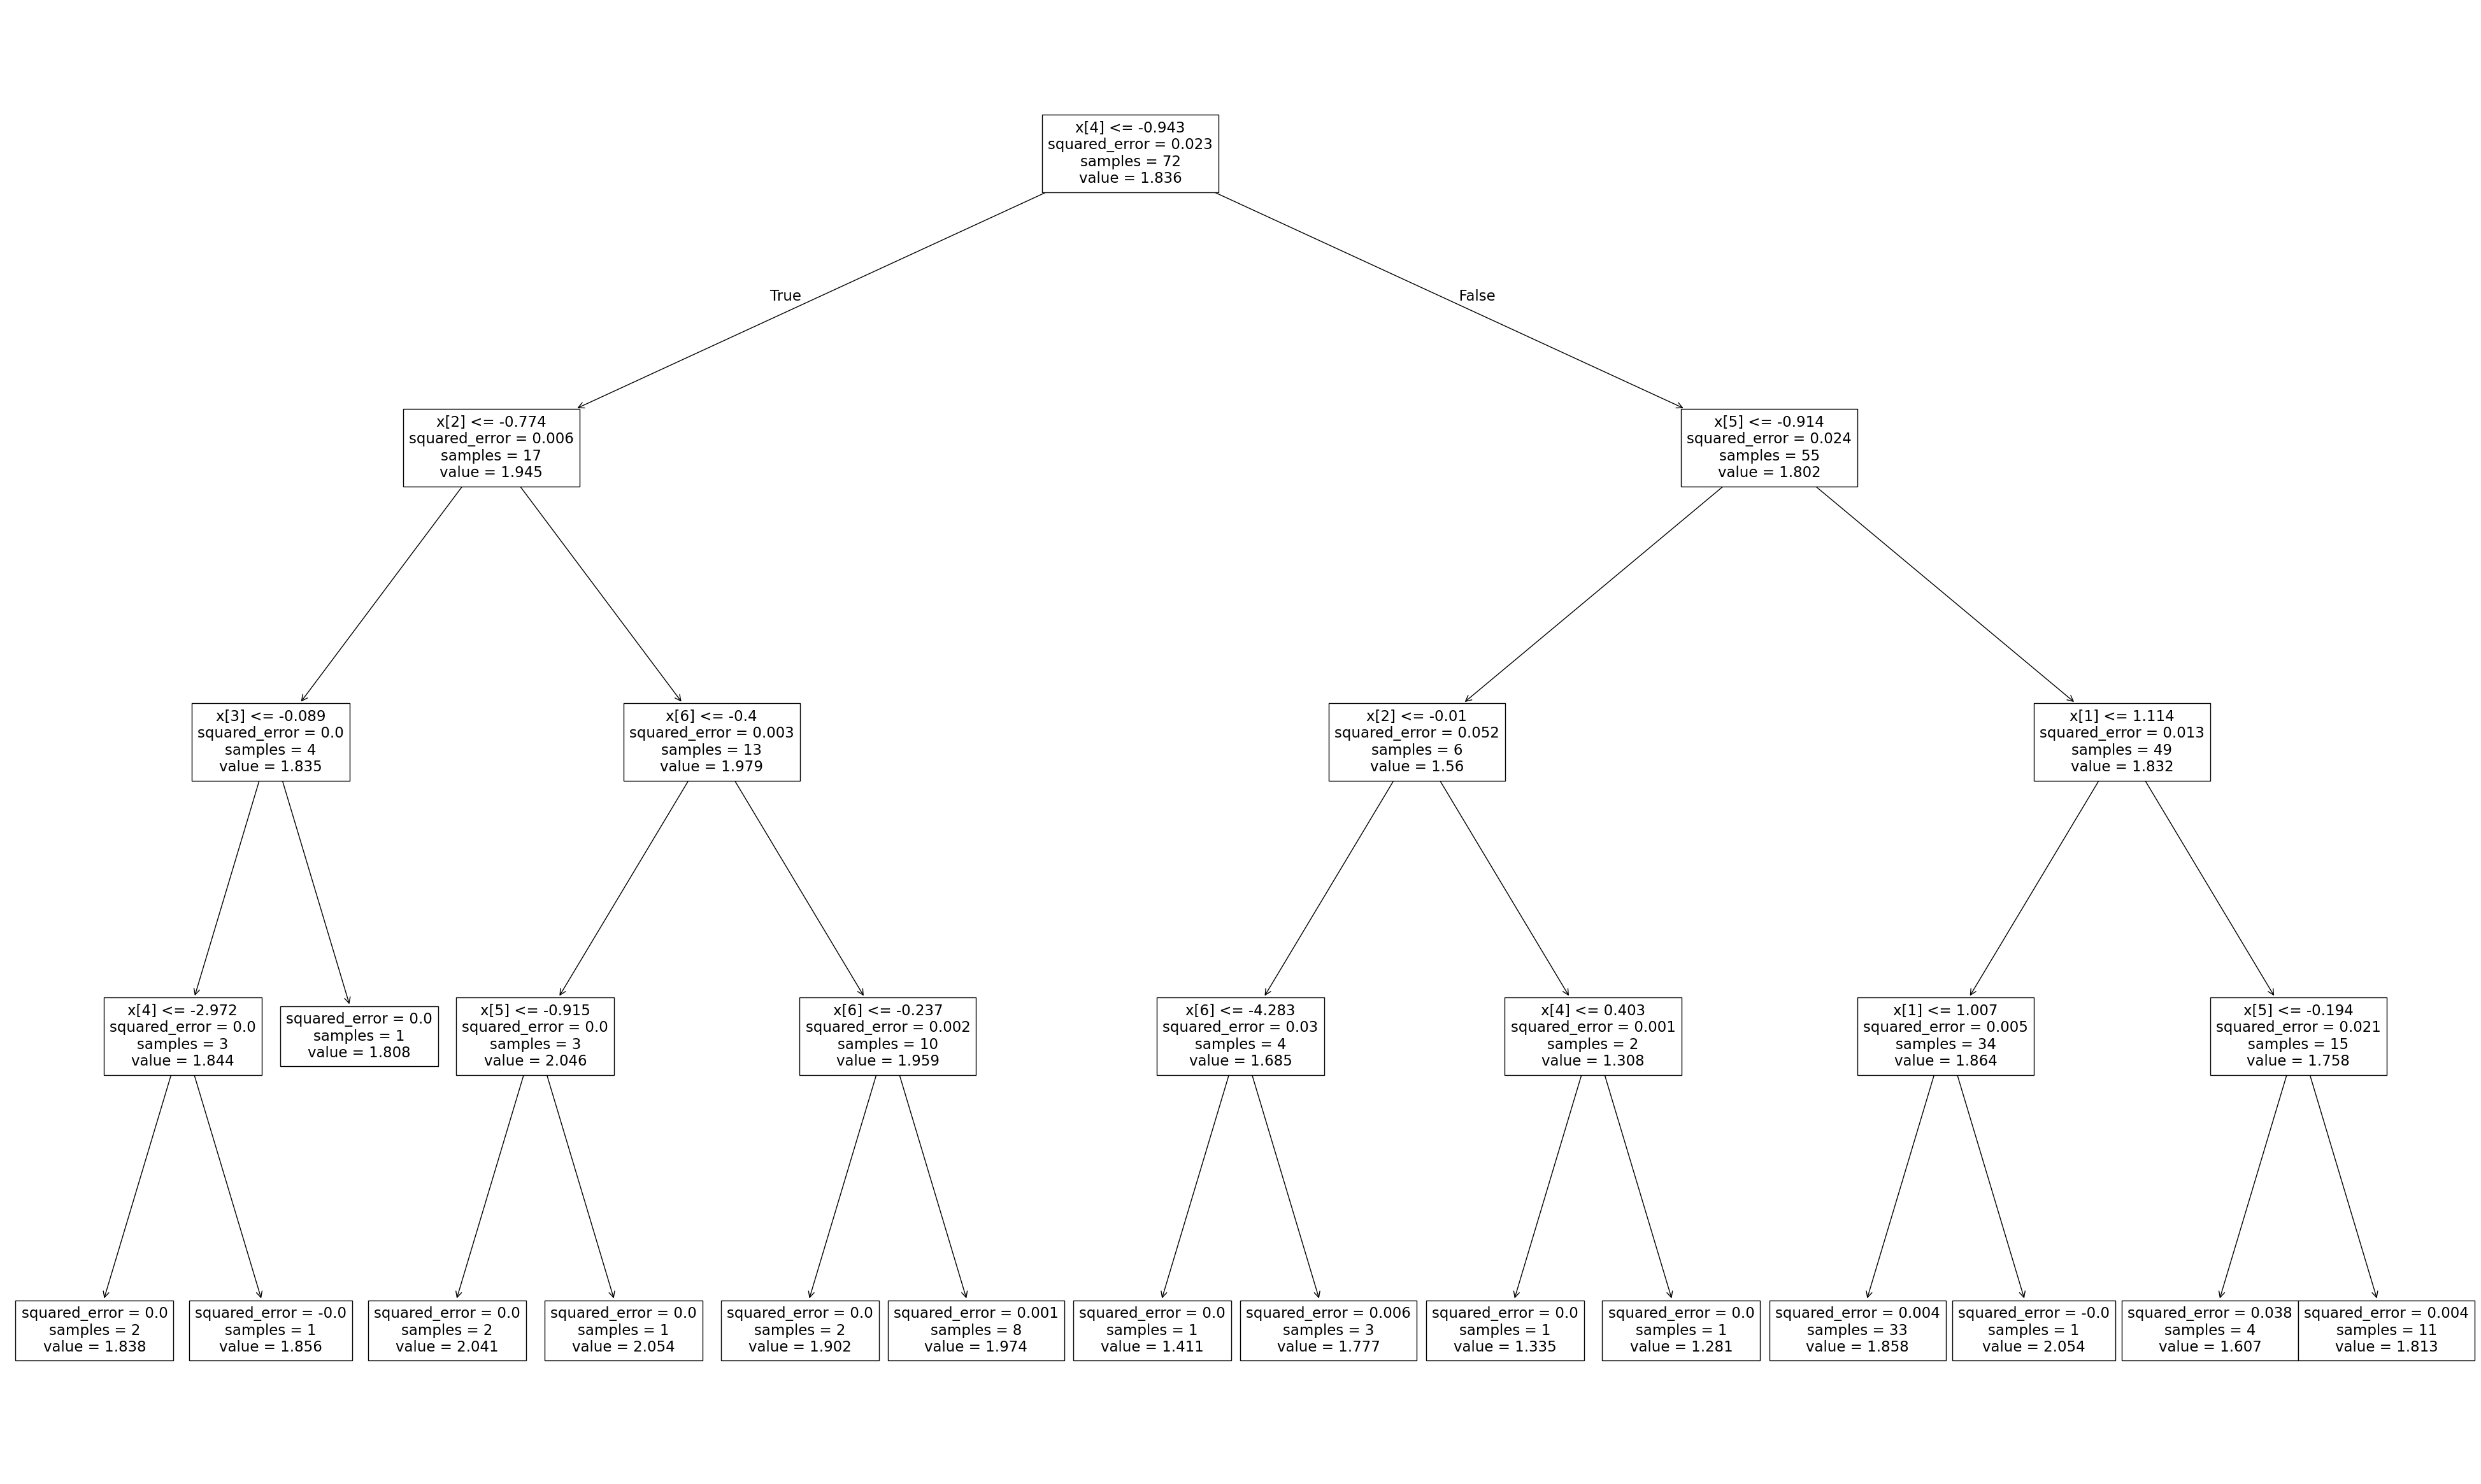

In [805]:
plt.figure(figsize=(50,30))
tree.plot_tree(dt)
plt.show()

### 7.3 Linear Regression

In [806]:
lr.fit(Xtrain, ytrain)

LinearRegression()

In [807]:
lr.intercept_

np.float64(1.8357884367306494)

## 8. Model Predictions

### 8.1 Random Forest Predictions

In [844]:
ypred_rf = rf.predict(Xtest)

print("training score = ", rf.score(Xtrain, ytrain))
print("testing score = ", rf.score(Xtest, ytest))

training score =  0.8687123112261036
testing score =  0.43656900743668814


### 8.2 Decission Tree Predictions

In [785]:
ypred_dt = dt.predict(Xtest)

print("training score = ", dt.score(Xtrain, ytrain))
print("testing score = ", dt.score(Xtest, ytest))

training score =  0.7861014558314086
testing score =  0.24324199327857243


### 8.3 Linear Regression Predictions

In [786]:
ypred_lr = lr.predict(Xtest)

print("training score = ", lr.score(Xtrain, ytrain))
print("testing score = ", lr.score(Xtest, ytest))

training score =  0.378150402391514
testing score =  0.46356820866883863


## 9. Model Evaluation

In [787]:
from sklearn.metrics import r2_score

### 9.1 Random Forest Evaluation

In [845]:
r2_score(ytest, ypred_rf)

0.43656900743668814

### 9.2 Decission Tree Evaluation

In [789]:
r2_score(ytest, ypred_dt)

0.24324199327857243

### 9.3 Linear Regression Evaluation

In [790]:
r2_score(ytest, ypred_lr)

0.46356820866883863

Text(0, 0.5, 'Y')

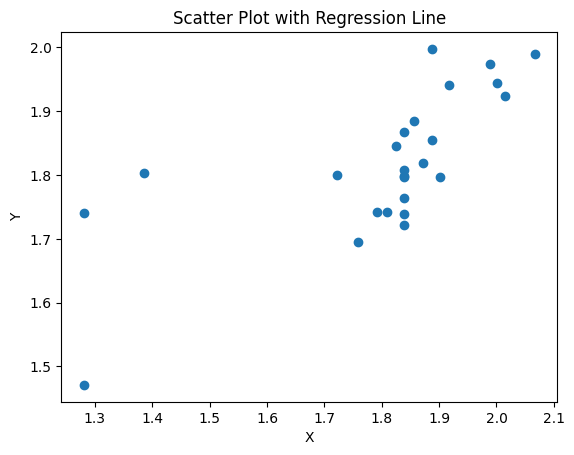

In [791]:
plt.scatter(ytest, ypred_lr)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X')
plt.ylabel('Y')

## 10. Saving Model